In [1]:
# 1° Analisis de equipos por cruzamiento de métricas (MAPA GLOBAL (LISTO) y BarH estilizado (en fase beta))
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

BIGDATA=pd.read_excel('Jugadores-CopaBinance2022.xlsx',sheet_name='BIGDATA',index_col='Nombre')
GLOBAL=pd.read_excel('Equipos-CopaBinance2022.xlsx',sheet_name='GLOBAL',index_col='Unnamed: 0').T
Tiempo1=pd.read_excel('Equipos-CopaBinance2022.xlsx',sheet_name='1TIEMPO',index_col='Unnamed: 0').T
Tiempo2=pd.read_excel('Equipos-CopaBinance2022.xlsx',sheet_name='2TIEMPO',index_col='Unnamed: 0').T
GLOBAL = GLOBAL[GLOBAL['Regates'].notna()]
Vacios = GLOBAL[ GLOBAL['Posesión de balón'] == ' ' ].index
GLOBAL.drop(Vacios , inplace=True)
Tiempo1 = Tiempo1[Tiempo1['Regates'].notna()]
Vacios = Tiempo1[ Tiempo1['Posesión de balón'] == ' ' ].index
Tiempo1.drop(Vacios , inplace=True)
Tiempo2 = Tiempo2[Tiempo2['Regates'].notna()]
Vacios = Tiempo2[ Tiempo2['Posesión de balón'] == ' ' ].index
Tiempo2.drop(Vacios , inplace=True)
#### Agregado de Rival-Resultado-Condicion a BIGDATA
Fixture=pd.read_excel('ResultadosCopaBinance2022.xlsx')
ContadorFixture=0
inicio=0
BIGDATA['Resultado']=""
BIGDATA['Rival']=''
BIGDATA['Condicion']=''
BIGDATA['Local']=''
BIGDATA['Visitante']=''
BIGDATA['Partido']=''
for i in range(0,len(BIGDATA.index)):
    if BIGDATA['Equipo'].iloc[i]==Fixture['Local'][ContadorFixture]:
        BIGDATA['Rival'][i]=Fixture['Visitante'][ContadorFixture]
        BIGDATA['Condicion'][i]='Home'
        BIGDATA['Local'][i]=Fixture['L'][ContadorFixture]
        BIGDATA['Visitante'][i]=Fixture['V'][ContadorFixture]
        BIGDATA['Partido'][i]=BIGDATA['Equipo'][i]+'-'+BIGDATA['Rival'][i]
    elif BIGDATA['Equipo'].iloc[i]==Fixture['Visitante'][ContadorFixture]:
        BIGDATA['Rival'][i]=Fixture['Local'][ContadorFixture]
        BIGDATA['Condicion'][i]='Away'
        BIGDATA['Local'][i]=Fixture['L'][ContadorFixture]
        BIGDATA['Visitante'][i]=Fixture['V'][ContadorFixture]
        BIGDATA['Partido'][i]=BIGDATA['Rival'][i]+'-'+BIGDATA['Equipo'][i]
    else:
        for a in range(inicio,i):
            BIGDATA['Resultado'][a]=Fixture['Resultado'][ContadorFixture]      
        inicio=i
        ContadorFixture=ContadorFixture+1
        if BIGDATA['Equipo'].iloc[i]==Fixture['Local'][ContadorFixture]:
            BIGDATA['Rival'][i]=Fixture['Visitante'][ContadorFixture]
            BIGDATA['Condicion'][i]='Home'
            BIGDATA['Local'][i]=Fixture['L'][ContadorFixture]
            BIGDATA['Visitante'][i]=Fixture['V'][ContadorFixture]
            BIGDATA['Partido'][i]=BIGDATA['Equipo'][i]+'-'+BIGDATA['Rival'][i]   
        else:
            BIGDATA['Rival'][i]=Fixture['Local'][ContadorFixture]
            BIGDATA['Condicion'][i]='Away'
            BIGDATA['Local'][i]=Fixture['L'][ContadorFixture]
            BIGDATA['Visitante'][i]=Fixture['V'][ContadorFixture]
            BIGDATA['Partido'][i]=BIGDATA['Rival'][i]+'-'+BIGDATA['Equipo'][i]
for a in range(inicio,i+1):
    BIGDATA['Resultado'][a]=BIGDATA['Resultado'][a]=Fixture['Resultado'][ContadorFixture]   
####
BIGDATA.insert(loc = 4, column = 'Goles y Asistencias', value = BIGDATA['Goles']+BIGDATA['Asistencias'])
### Numerizando GLOBAL
GLOBAL['Posesión de balón']=GLOBAL['Posesión de balón'].astype('float64')*100
GLOBAL[['Tiros totales', 'Tiros a puerta', 'Tiros fuera','Disparos bloqueados', 'Saques de esquina', 'Fueras de juego',
        'Faltas','Tarjetas amarillas', 'Tarjetas rojas', 'Ocasiones claras','Ocasiones claras falladas', 'Disparos al Palo',
        'Contraataques','Tiros en contraataque', 'Goles en contraataque','Tiros dentro del área',
        'Tiros desde fuera del área', 'Paradas','Pases', 'Pases totales', 'Porc. Pases efectivos','Pases largos efectivos',
        'Pases largos totales','Porc. Pases largos efectivos', 'Centros completados','Centros intentados',
        'Porc. Centros completados','Regates completados', 'Regates intentados', 'Porc. Regates efectivos','Posesión perdida',
        'Duelos ganados', 'Balones aéreos ganados','Entradas', 'Intercepciones', 'Despejes']]=GLOBAL[['Tiros totales', 'Tiros a puerta', 'Tiros fuera',
       'Disparos bloqueados', 'Saques de esquina', 'Fueras de juego', 'Faltas','Tarjetas amarillas', 'Tarjetas rojas','Ocasiones claras',
       'Ocasiones claras falladas', 'Disparos al Palo', 'Contraataques','Tiros en contraataque', 'Goles en contraataque',
       'Tiros dentro del área', 'Tiros desde fuera del área', 'Paradas','Pases', 'Pases totales', 'Porc. Pases efectivos',
       'Pases largos efectivos', 'Pases largos totales','Porc. Pases largos efectivos', 'Centros completados',
       'Centros intentados', 'Porc. Centros completados','Regates completados', 'Regates intentados', 'Porc. Regates efectivos',
       'Posesión perdida', 'Duelos ganados', 'Balones aéreos ganados','Entradas', 'Intercepciones', 'Despejes']].astype('int64')
####
pd.options.display.max_columns = None

In [2]:
# 2° Creación de nuevas columnas
GLOBAL=GLOBAL.loc[GLOBAL['Posesión de balón']>0]
GLOBAL.rename(columns={'Pases totales':'Pases acertados','Disparos al Palo':'Disparos al palo','Pases':'Pases totales'},inplace=True)
GLOBAL=GLOBAL.drop(['Centros', 'Regates','Pases acierte','Pases largos'], axis=1)
GLOBAL['Porc. Tiros a puerta']=GLOBAL['Tiros a puerta']/GLOBAL['Tiros totales']
GLOBAL['Pases por cada perdida']=GLOBAL['Pases totales']/GLOBAL['Posesión perdida']
GLOBAL['Porc. Tiros dentro del área']=GLOBAL['Tiros dentro del área']/GLOBAL['Tiros totales']
GLOBAL['Porc. Tiros fuera del área']=GLOBAL['Tiros desde fuera del área']/GLOBAL['Tiros totales']
Rival=['Posesión de balón Rival', 'Tiros totales Rival', 'Tiros a puerta Rival', 'Tiros fuera Rival',
       'Disparos bloqueados Rival', 'Saques de esquina Rival', 'Fueras de juego Rival', 'Faltas Rival',
       'Tarjetas amarillas Rival', 'Tarjetas rojas Rival', 'Ocasiones claras Rival',
       'Ocasiones claras falladas Rival', 'Disparos al palo Rival', 'Contraataques Rival',
       'Tiros en contraataque Rival', 'Goles en contraataque Rival',
       'Tiros dentro del área Rival', 'Tiros desde fuera del área Rival', 'Paradas Rival',
       'Pases totales Rival', 'Pases acertados Rival', 'Porc. Pases efectivos Rival',
       'Pases largos efectivos Rival', 'Pases largos totales Rival',
       'Porc. Pases largos efectivos Rival', 'Centros completados Rival',
       'Centros intentados Rival', 'Porc. Centros completados Rival',
       'Regates completados Rival', 'Regates intentados Rival', 'Porc. Regates efectivos Rival',
       'Posesión perdida Rival', 'Duelos ganados Rival', 'Balones aéreos ganados Rival',
       'Entradas Rival', 'Intercepciones Rival', 'Despejes Rival', 'Rival',
       'Porc. Tiros a puerta Rival','Pases por cada perdida Rival',
       'Porc. Tiros dentro del área Rival','Porc. Tiros fuera del área Rival']
Lista=['Posesión de balón', 'Tiros totales', 'Tiros a puerta', 'Tiros fuera',
       'Disparos bloqueados', 'Saques de esquina', 'Fueras de juego', 'Faltas',
       'Tarjetas amarillas', 'Tarjetas rojas', 'Ocasiones claras',
       'Ocasiones claras falladas', 'Disparos al palo', 'Contraataques',
       'Tiros en contraataque', 'Goles en contraataque',
       'Tiros dentro del área', 'Tiros desde fuera del área', 'Paradas',
       'Pases totales', 'Pases acertados', 'Porc. Pases efectivos',
       'Pases largos efectivos', 'Pases largos totales',
       'Porc. Pases largos efectivos', 'Centros completados',
       'Centros intentados', 'Porc. Centros completados',
       'Regates completados', 'Regates intentados', 'Porc. Regates efectivos',
       'Posesión perdida', 'Duelos ganados', 'Balones aéreos ganados',
       'Entradas', 'Intercepciones', 'Despejes', 'equipo',
       'Porc. Tiros a puerta','Pases por cada perdida','Porc. Tiros dentro del área','Porc. Tiros fuera del área']
GLOBAL[Rival]=0
for a,b in zip(Lista,Rival):  
    for i in range(1,int(len(GLOBAL)/2)+1):
        GLOBAL[b][i*2-1]=GLOBAL[a][i*2]
        GLOBAL[b][i*2]=GLOBAL[a][i*2-1]
GLOBAL['Goles Rival']=GLOBAL['Tiros a puerta Rival']-GLOBAL['Paradas']
GLOBAL['Goles']=GLOBAL['Tiros a puerta']-GLOBAL['Paradas Rival']
GLOBAL['Goles x Tiros totales']=GLOBAL['Goles']/GLOBAL['Tiros totales']
GLOBAL['Goles x Tiros a puerta']=GLOBAL['Goles']/GLOBAL['Tiros a puerta']
GLOBAL['Goles x Tiros totales Rival']=GLOBAL['Goles Rival']/GLOBAL['Tiros totales Rival']
GLOBAL['Goles x Tiros a puerta Rival']=GLOBAL['Goles Rival']/GLOBAL['Tiros a puerta Rival']
GLOBAL['Resultado']=0
GLOBAL['Puntos']=0
for i in range(1,len(GLOBAL)):
    if GLOBAL['Goles'][i]<GLOBAL['Goles Rival'][i]:
        GLOBAL['Resultado'][i]='Derrota'
        GLOBAL['Puntos'][i]=0
    elif GLOBAL['Goles'][i]>GLOBAL['Goles Rival'][i]:
        GLOBAL['Resultado'][i]='Victoria'
        GLOBAL['Puntos'][i]=3
    else :
        GLOBAL['Resultado'][i]='Empate'
        GLOBAL['Puntos'][i]=1
        

In [3]:
# 3° Creación de nuevas columnas (separado para mayor orden)
Partidos=GLOBAL.groupby('equipo').count()['Posesión de balón'][0]
GLOBAL=GLOBAL.groupby('equipo').sum()

GLOBAL['Goles x Tiros totales']=GLOBAL['Goles']/GLOBAL['Tiros totales']
GLOBAL['Goles x Tiros a puerta']=GLOBAL['Goles']/GLOBAL['Tiros a puerta']
GLOBAL['Goles x Tiros totales Rival']=GLOBAL['Goles Rival']/GLOBAL['Tiros totales Rival']
GLOBAL['Goles x Tiros a puerta Rival']=GLOBAL['Goles Rival']/GLOBAL['Tiros a puerta Rival']
GLOBAL['Porc. Tiros a puerta']=GLOBAL['Tiros a puerta']/GLOBAL['Tiros totales']
GLOBAL['Pases por cada perdida']=GLOBAL['Pases totales']/GLOBAL['Posesión perdida']
GLOBAL['Porc. Tiros dentro del área']=GLOBAL['Tiros dentro del área']/GLOBAL['Tiros totales']
GLOBAL['Porc. Tiros fuera del área']=GLOBAL['Tiros desde fuera del área']/GLOBAL['Tiros totales']
GLOBAL['Porc. Tiros a puerta Rival']=GLOBAL['Tiros a puerta Rival']/GLOBAL['Tiros totales Rival']
GLOBAL['Pases por cada perdida Rival']=GLOBAL['Pases totales Rival']/GLOBAL['Posesión perdida Rival']
GLOBAL['Porc. Tiros dentro del área Rival']=GLOBAL['Tiros dentro del área Rival']/GLOBAL['Tiros totales Rival']
GLOBAL['Porc. Tiros fuera del área Rival']=GLOBAL['Tiros desde fuera del área Rival']/GLOBAL['Tiros totales Rival']
GLOBAL['Posesión de balón']=GLOBAL['Posesión de balón']/Partidos
GLOBAL['Posesión de balón Rival']=GLOBAL['Posesión de balón Rival']/Partidos
GLOBAL['Porc. Pases efectivos']=GLOBAL['Pases acertados']/GLOBAL['Pases totales']
GLOBAL['Porc. Pases largos efectivos']=GLOBAL['Pases largos efectivos']/GLOBAL['Pases largos totales']
GLOBAL['Porc. Centros completados']=GLOBAL['Centros intentados']/GLOBAL['Centros completados']
GLOBAL['Porc. Regates efectivos']=GLOBAL['Regates completados']/GLOBAL['Regates intentados']
GLOBAL['Porc. Pases efectivos Rival']=GLOBAL['Pases acertados Rival']/GLOBAL['Pases totales Rival']
GLOBAL['Porc. Pases largos efectivos Rival']=GLOBAL['Pases largos efectivos Rival']/GLOBAL['Pases largos totales Rival']
GLOBAL['Porc. Centros completados Rival']=GLOBAL['Centros intentados Rival']/GLOBAL['Centros completados Rival']
GLOBAL['Porc. Regates efectivos Rival']=GLOBAL['Regates completados Rival']/GLOBAL['Regates intentados Rival']

In [57]:
# 4° Selección de Métricas para el MAPA (Solo dos variables)
import numpy as np
print(GLOBAL.keys())
a=input()
b=input()
GLOBALL=GLOBAL
GLOBALL['Ordenador']=GLOBALL[a]/GLOBALL[b]
GLOBALL=GLOBALL.sort_values(by=a,ascending=False)
GLOBALLL=GLOBALL.sort_values(by=a,ascending=False).head(2)
Equipos=list(GLOBALL.index+'BN.png')
print(Equipos[0:2])
Equipos[0:2]=list(GLOBALLL.index+'.png')
Metrica1=list(GLOBALL[a])
Metrica2=list(GLOBALL[b])
#print(Equipos)
#print(MetricaGoles)
#print(MetricaTirosAlArco)
paths = Equipos

Index(['Posesión de balón', 'Tiros totales', 'Tiros a puerta', 'Tiros fuera',
       'Disparos bloqueados', 'Saques de esquina', 'Fueras de juego', 'Faltas',
       'Tarjetas amarillas', 'Tarjetas rojas', 'Ocasiones claras',
       'Ocasiones claras falladas', 'Disparos al palo', 'Contraataques',
       'Tiros en contraataque', 'Goles en contraataque',
       'Tiros dentro del área', 'Tiros desde fuera del área', 'Paradas',
       'Pases totales', 'Pases acertados', 'Porc. Pases efectivos',
       'Pases largos efectivos', 'Pases largos totales',
       'Porc. Pases largos efectivos', 'Centros completados',
       'Centros intentados', 'Porc. Centros completados',
       'Regates completados', 'Regates intentados', 'Porc. Regates efectivos',
       'Posesión perdida', 'Duelos ganados', 'Balones aéreos ganados',
       'Entradas', 'Intercepciones', 'Despejes', 'Porc. Tiros a puerta',
       'Pases por cada perdida', 'Porc. Tiros dentro del área',
       'Porc. Tiros fuera del área', 'Po

a
asda
2
c-1
12


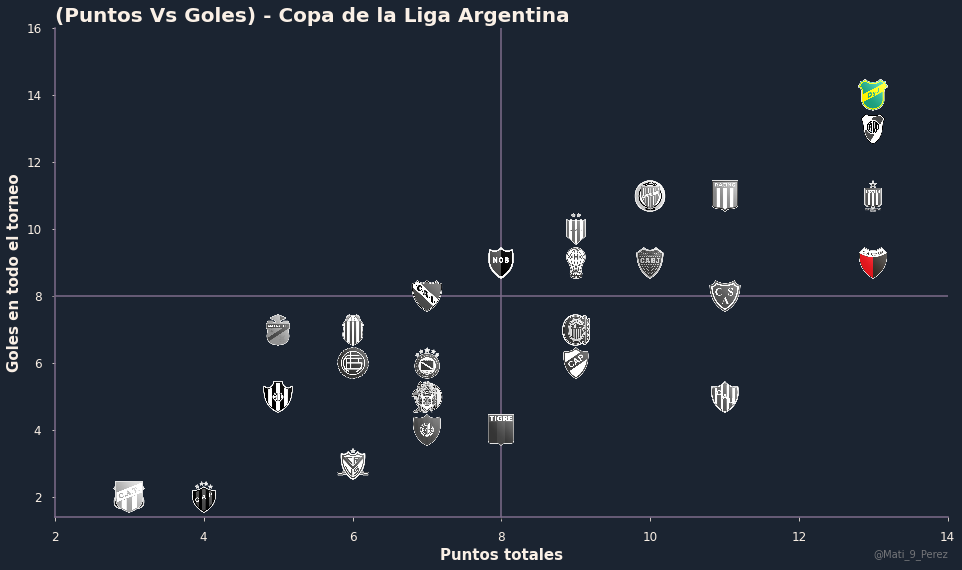

In [58]:
#5° MAPA de equipos (Scatter plot con escudos)
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.patches as patches
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,AnnotationBbox)
from matplotlib.offsetbox import AnchoredText

def getImage(path, zoom=0.17):
    return OffsetImage(plt.imread(path), zoom=zoom)


#paths = ['AldosiviBN.png', 'Argentinos JrsBN.png', 'ArsenalBN.png', 'Atl. TucumanBN.png', 'BanfieldBN.png', 'Barracas Ctral.BN.png',
         #'BocaBN.png', 'CA HuracanBN.png', 'Central CBABN.png', 'ColonBN.png', 'Def. y JusticiaBN.png', 'Estudiantes LPBN.png',
         #'Gimnasia LPBN.png', 'Godoy CruzBN.png', 'IndependienteBN.png', 'LanusBN.png', 'Newell´sBN.png', 'PatronatoBN.png',
         #'PlatenseBN.png', 'Racing ClubBN.png', 'River.png', 'Rosario Ctral.BN.png', 'San LorenzoBN.png', 'SarmientoBN.png',
         #'TalleresBN.png', 'TigreBN.png', 'UnionBN.png', 'Velez SarsfieldBN.png']
Equipos=list(GLOBALL.index)

    
Int=[0.01,0.02,0.05,0.1,0.2,0.25,0.5,1,2,5,10,25,50,100,200,250,500,1000]
contador=0
Distancia=(max(Metrica1)-min(Metrica1))/6
Multx=[]
Multy=[]
for c in range(0,len(Int)):
    if Distancia<Int[c] and contador==0:
        if Distancia-Int[c-1]>=(Int[c]-Int[c-1])/2:
            Minimo=int(min(Metrica1)/Int[c])*Int[c]
            Iter=int((max(Metrica1)-Minimo)/Int[c])
            for d in range(0,Iter+2):
                Multx.append(Minimo+d*Int[c])
        else:
            Minimo=int(min(Metrica1)/Int[c-1])*Int[c-1]
            Iter=int((max(Metrica1)-Minimo)/Int[c-1])
            for d in range(0,Iter+2):
                Multx.append(Minimo+d*Int[c-1])    
        contador=1
    else:
        pass
Distancia=(max(Metrica2)-min(Metrica2))/6
contador=0
for c in range(0,len(Int)):
    if Distancia<Int[c] and contador==0:
        if Distancia-Int[c-1]>=(Int[c]-Int[c-1])/2:
            Minimo=int(min(Metrica2)/Int[c])*Int[c]
            Iter=int((max(Metrica2)-Minimo)/Int[c])
            for d in range(0,Iter+2):
                Multy.append(Minimo+d*Int[c])
        else:
            Minimo=int(min(Metrica2)/Int[c-1])*Int[c-1]
            Iter=int((max(Metrica2)-Minimo)/Int[c-1])
            for d in range(0,Iter+2):
                Multy.append(Minimo+d*Int[c-1])    
        contador=1
    else:
        pass  
Atr1=a
Atr2=b
x=Metrica1
y=Metrica2
fig, ax = plt.subplots(figsize =(16, 9))
ax.scatter(x, y) 

fig.patch.set_facecolor('xkcd:dark')
ax.set_facecolor('xkcd:dark')
#fig.patch.set_facecolor('black') - DISTINTOS TIPOS DE COLORES -
#ax.set_facecolor('black')
#fig.patch.set_facecolor('#2d1c3c')
#ax.set_facecolor('#2d1c3c')

# TEXTO AGREGADO EN LAS CUADRICULAS A MODO DE DETALLE. EN PROCESO DE AUTOMATIZACION.
#ax.text(0.001, 1, 'Muchos disparos y pocos goles. Baja efectividad',horizontalalignment='left',color='red',verticalalignment='top',transform=ax.transAxes)
#ax.text(1, 1, 'Muchos disparos y goles. Alta ofensividad ',horizontalalignment='right',color='yellow',verticalalignment='top',transform=ax.transAxes)
#ax.text(0.001, 0, 'Pocos disparos y goles. Baja ofensividad',color='red',horizontalalignment='left',verticalalignment='bottom',transform=ax.transAxes)
#ax.text(1, 0, 'Pocos disparos y muchos goles. Alta efectividad',color='green',horizontalalignment='right',verticalalignment='bottom',transform=ax.transAxes)
#at = AnchoredText(
#    "Figure 1a", prop=dict(size=15), frameon=True, loc='upper left')
#at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
#ax.add_artist(at)

#Bordes
#ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color('#7e6d8b')
#ax.spines['top'].set_color('#dddddd') 
#ax.spines['right'].set_color('red')
ax.spines['left'].set_color('#7e6d8b')

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)

ax.yaxis.set_tick_params(pad = 10,colors='linen',labelsize=12)

ax.set_xticks([(max(Metrica1)+min(Metrica1))/2+0.001], minor=True)
ax.set_yticks([(max(Metrica2)+min(Metrica2))/2+0.001], minor=True)
x_ticks = Multx
y_ticks = Multy
ax.set_yticks(y_ticks)
ax.set_xticks(x_ticks)


ax.grid(b=True, color ='#7e6d8b',linestyle ='-', linewidth = 0,alpha = 0.5)
ax.grid(which='minor', color ='#7e6d8b',linestyle ='-', linewidth = 1.5, alpha=1)

ax.set_xlabel(Atr1+r' totales', fontsize=15,color='linen',fontweight="bold")
ax.set_ylabel(Atr2+r' en todo el torneo', fontsize=15,color='linen',fontweight="bold")
ax.set_title('('+Atr1+' Vs '+Atr2+')'+' - Copa de la Liga Argentina',
                     loc ='left', color='linen',fontsize = 20,fontweight="bold")

fig.text(0.9, 0.06, '@Mati_9_Perez', fontsize = 10,
                 color ='linen', ha ='right', va ='bottom',
                 alpha = 0.4)

for x0, y0, path,E in zip(x, y,paths,Equipos):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)
    #offsetbox = TextArea(E, textprops=dict(color="linen"))
    #ac = AnnotationBbox(offsetbox, (x0, y0-(max(y)*0.023)), frameon=False)
    #ax.add_artist(ac)
    
fig.savefig(a+'vs'+b+' Equipos'+' F6.png', dpi = 300,bbox_inches="tight")

Index(['Posesión de balón', 'Tiros totales', 'Tiros a puerta', 'Tiros fuera',
       'Disparos bloqueados', 'Saques de esquina', 'Fueras de juego', 'Faltas',
       'Tarjetas amarillas', 'Tarjetas rojas', 'Ocasiones claras',
       'Ocasiones claras falladas', 'Disparos al palo', 'Contraataques',
       'Tiros en contraataque', 'Goles en contraataque',
       'Tiros dentro del área', 'Tiros desde fuera del área', 'Paradas',
       'Pases totales', 'Pases acertados', 'Porc. Pases efectivos',
       'Pases largos efectivos', 'Pases largos totales',
       'Porc. Pases largos efectivos', 'Centros completados',
       'Centros intentados', 'Porc. Centros completados',
       'Regates completados', 'Regates intentados', 'Porc. Regates efectivos',
       'Posesión perdida', 'Duelos ganados', 'Balones aéreos ganados',
       'Entradas', 'Intercepciones', 'Despejes', 'Porc. Tiros a puerta',
       'Pases por cada perdida', 'Porc. Tiros dentro del área',
       'Porc. Tiros fuera del área', 'Po

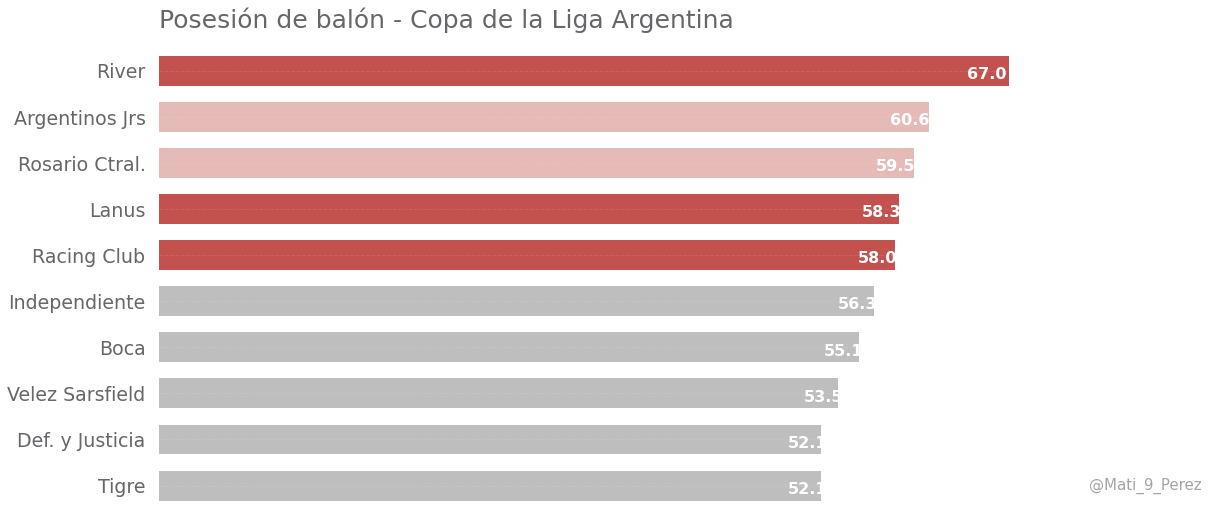

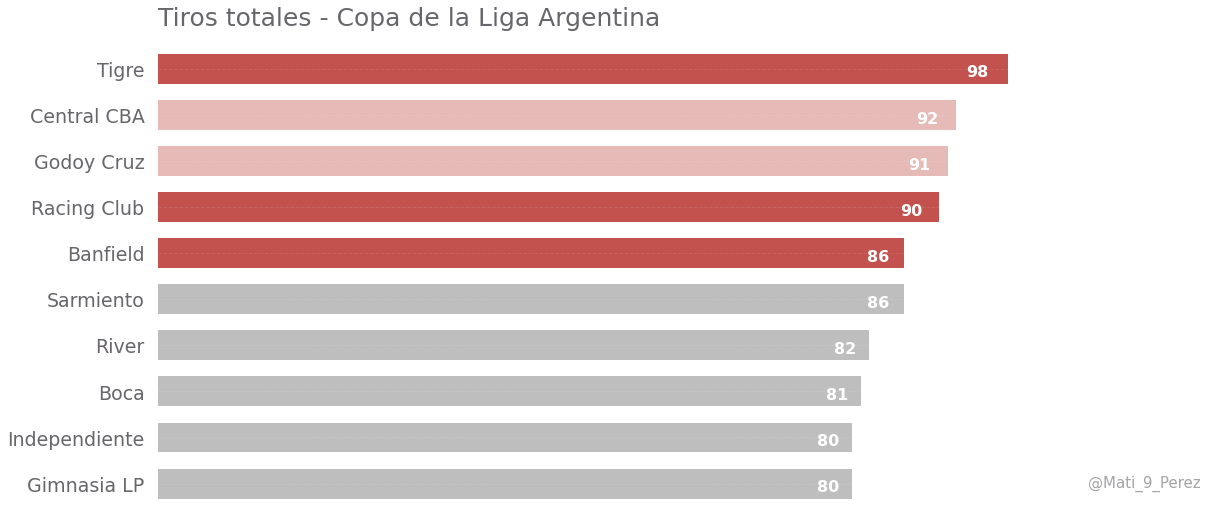

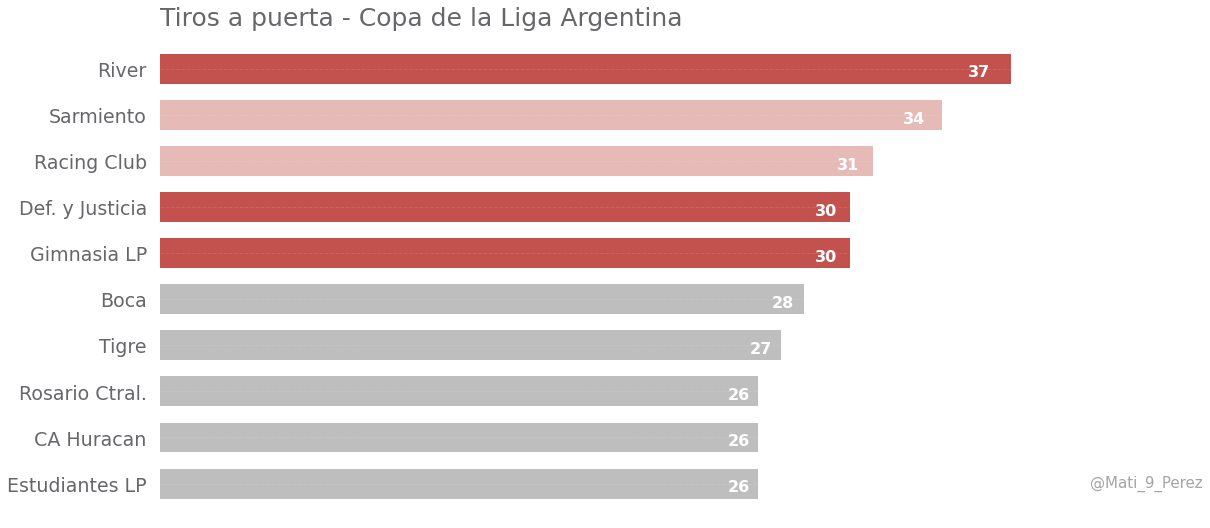

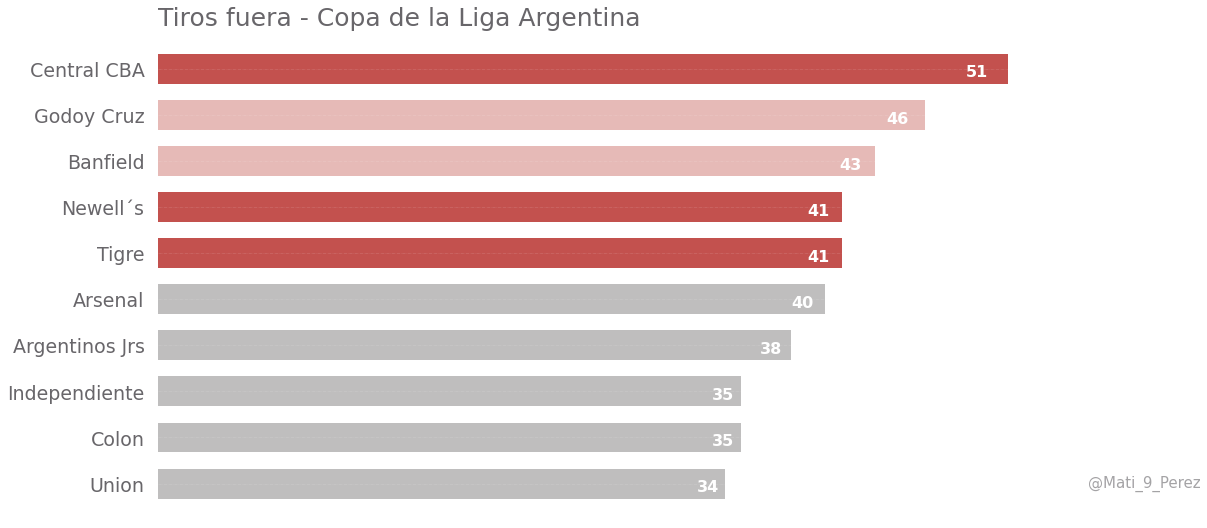

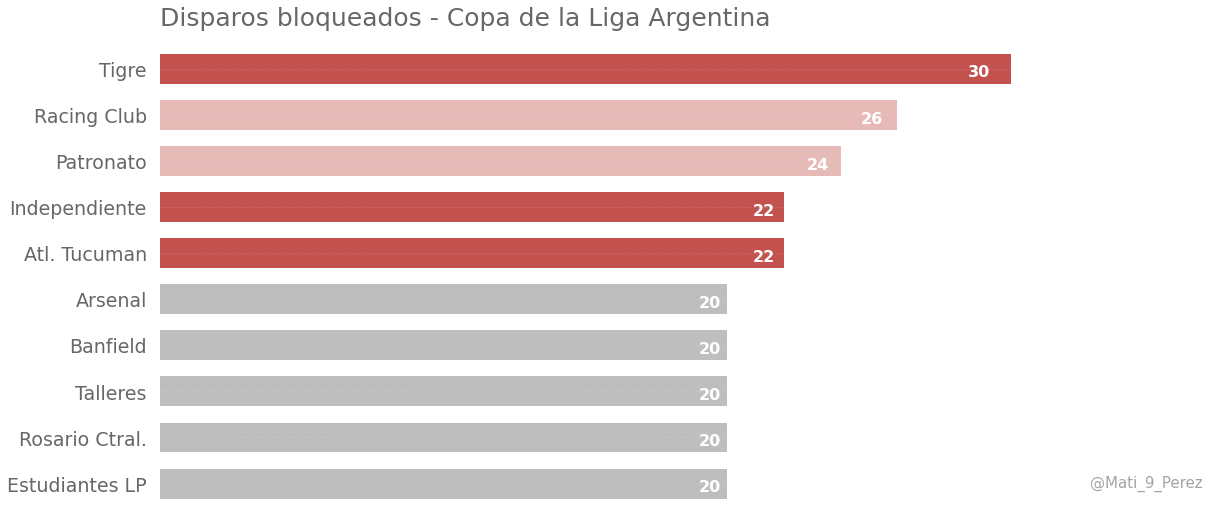

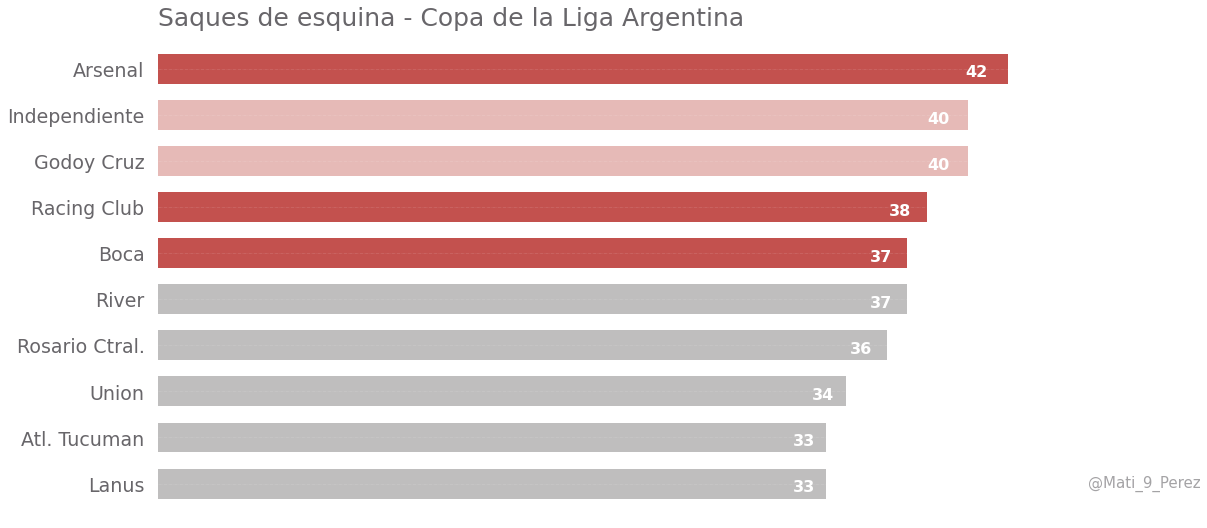

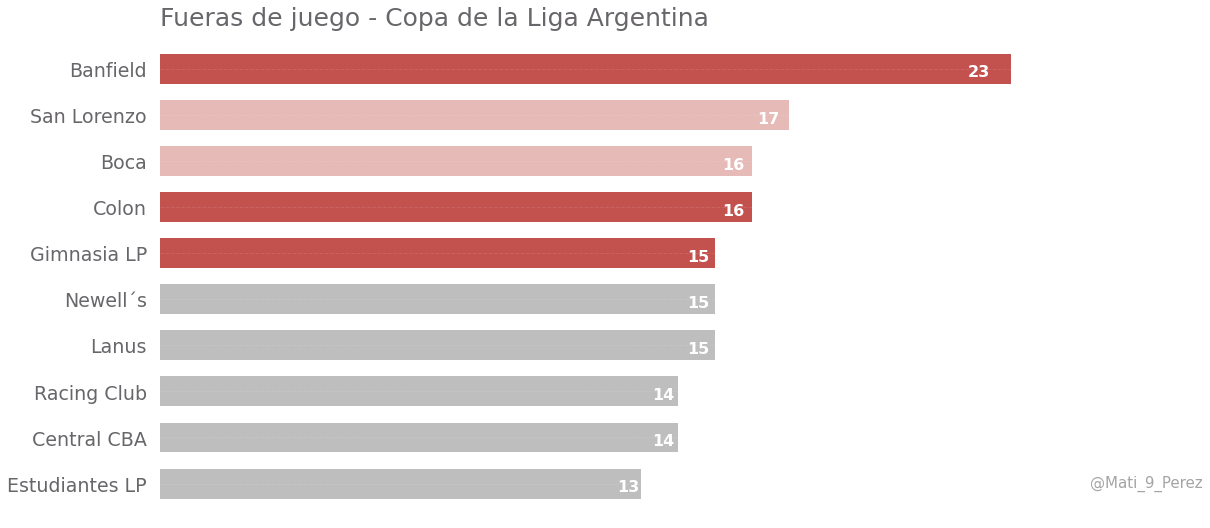

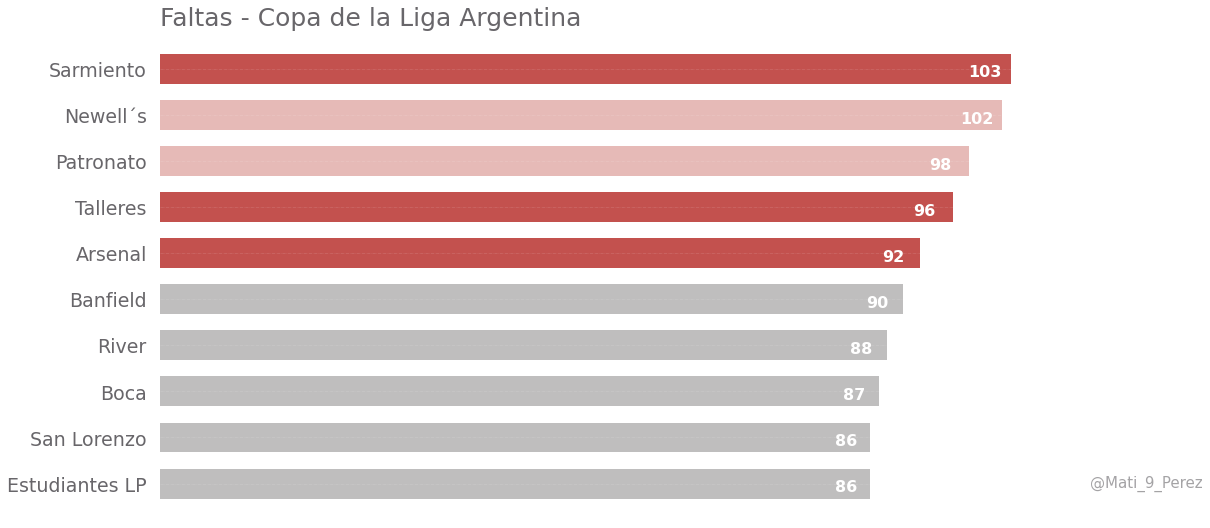

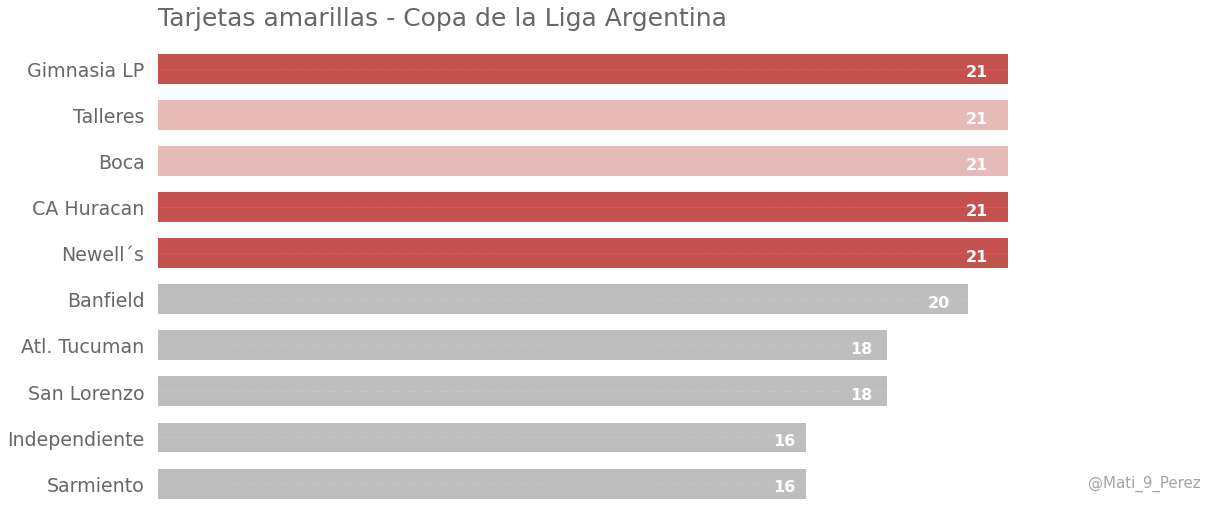

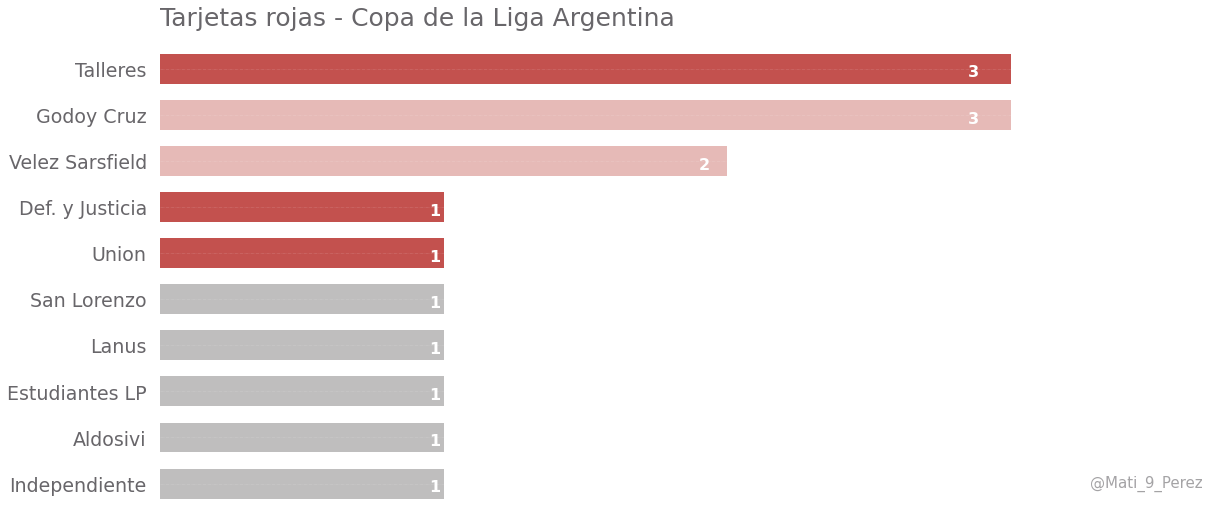

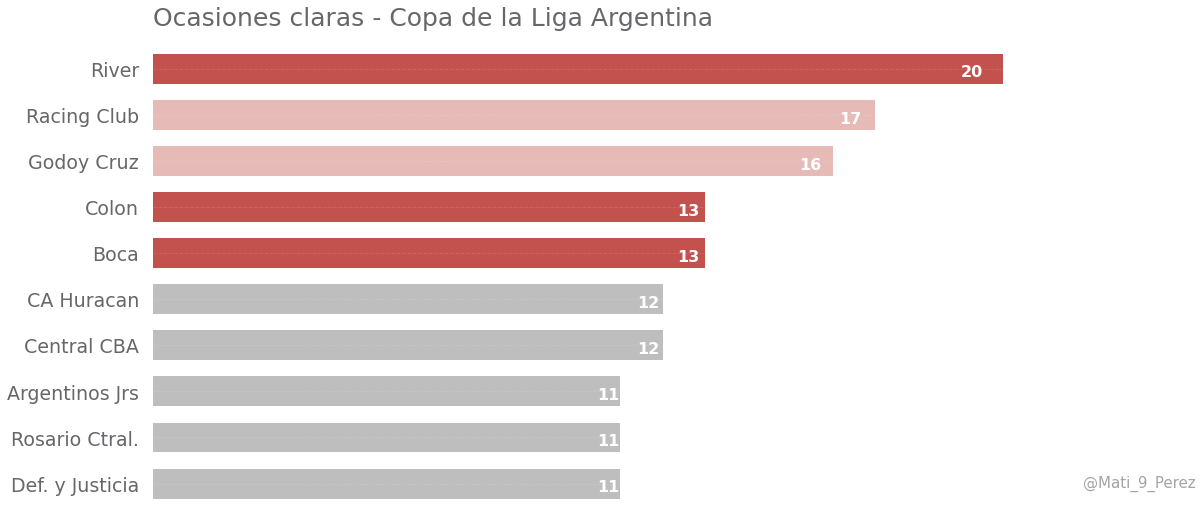

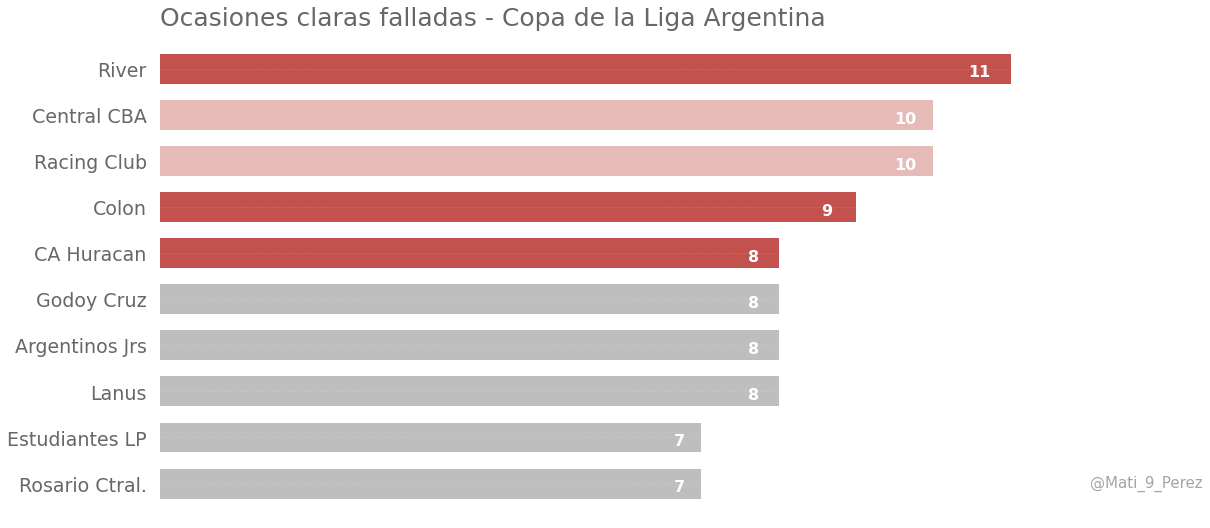

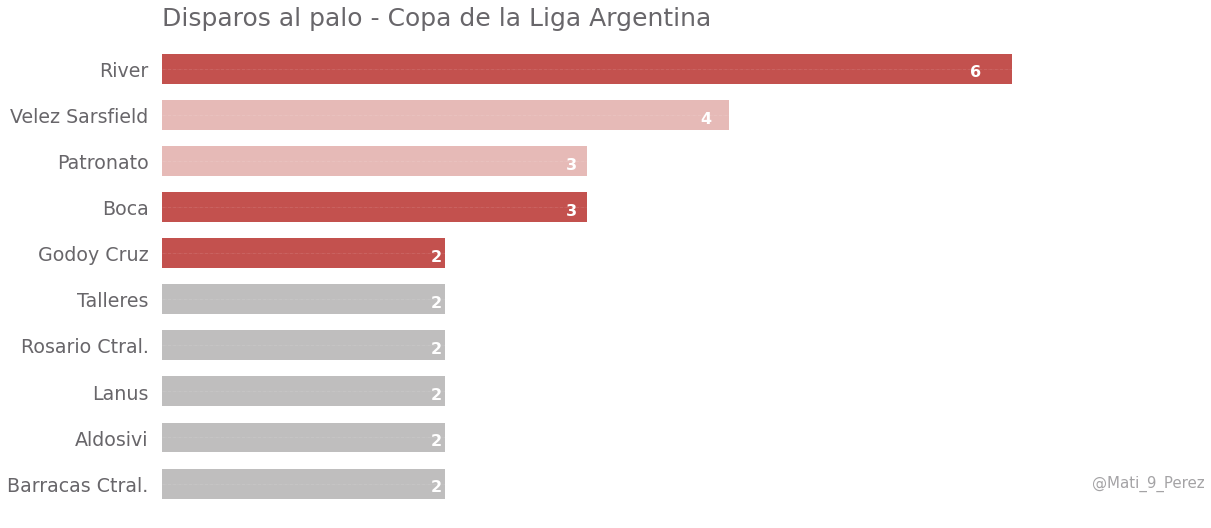

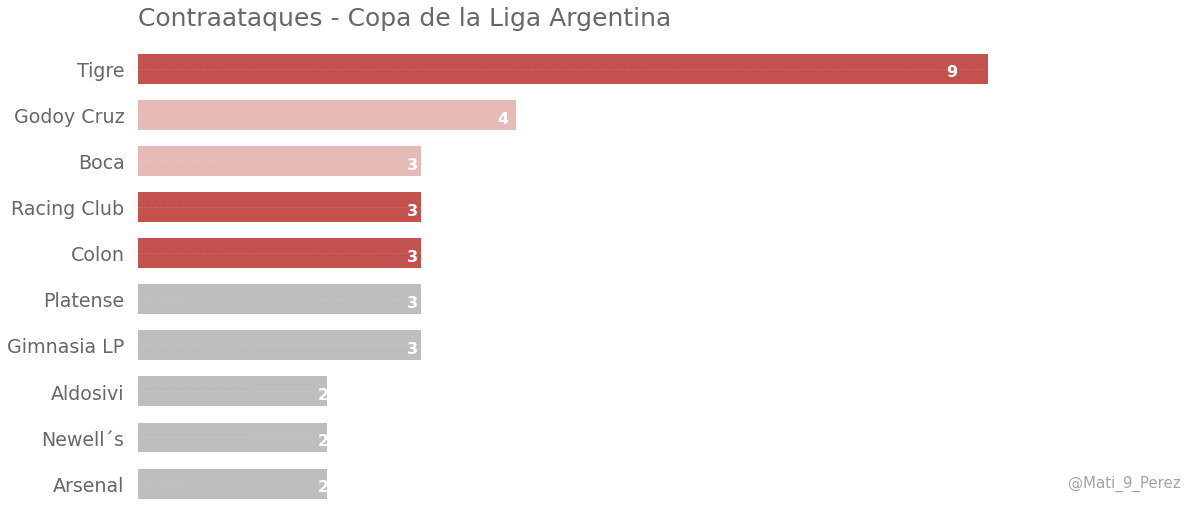

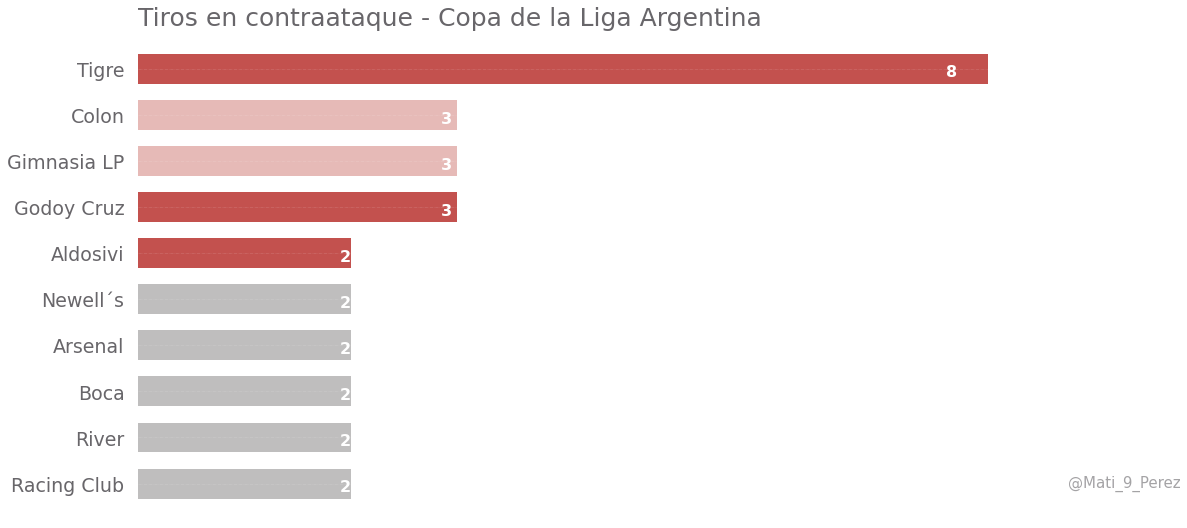

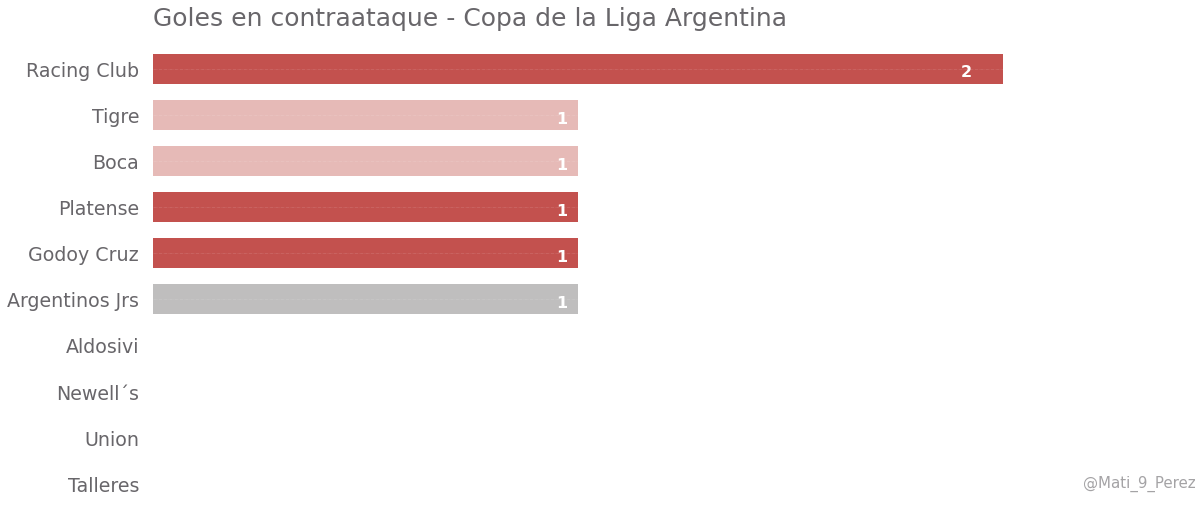

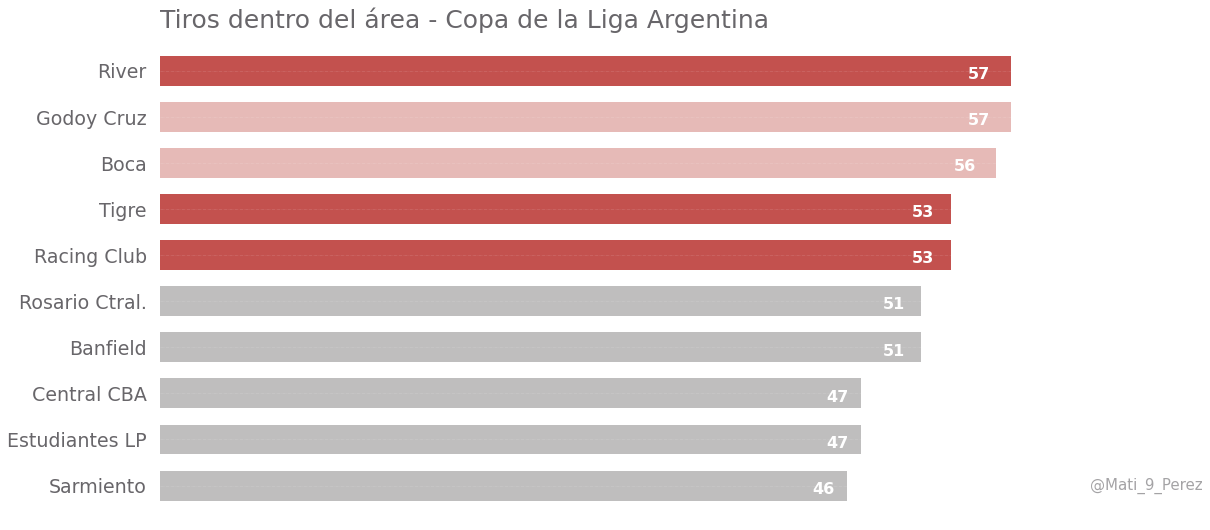

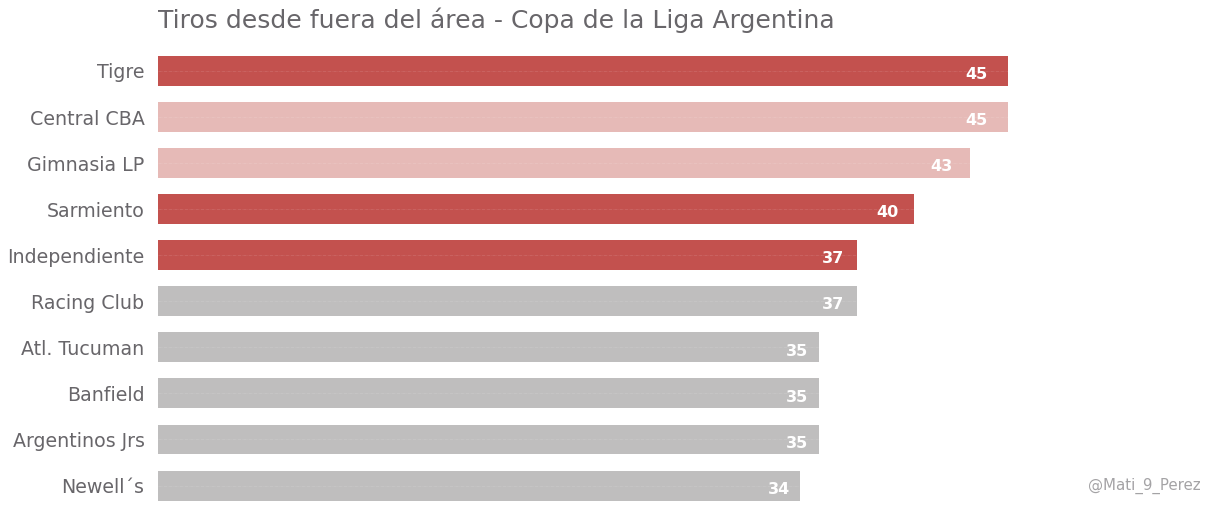

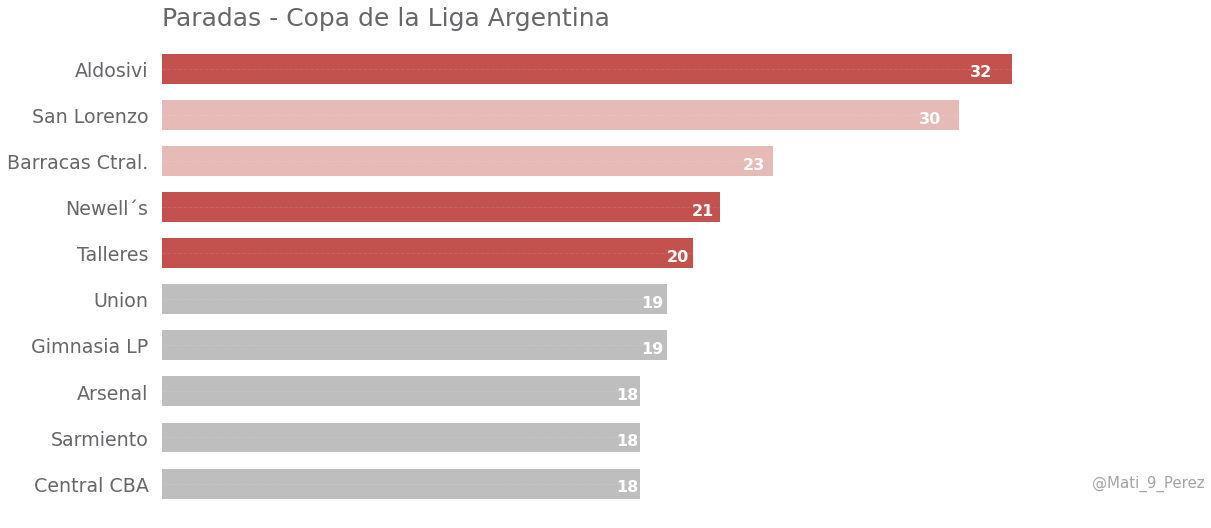

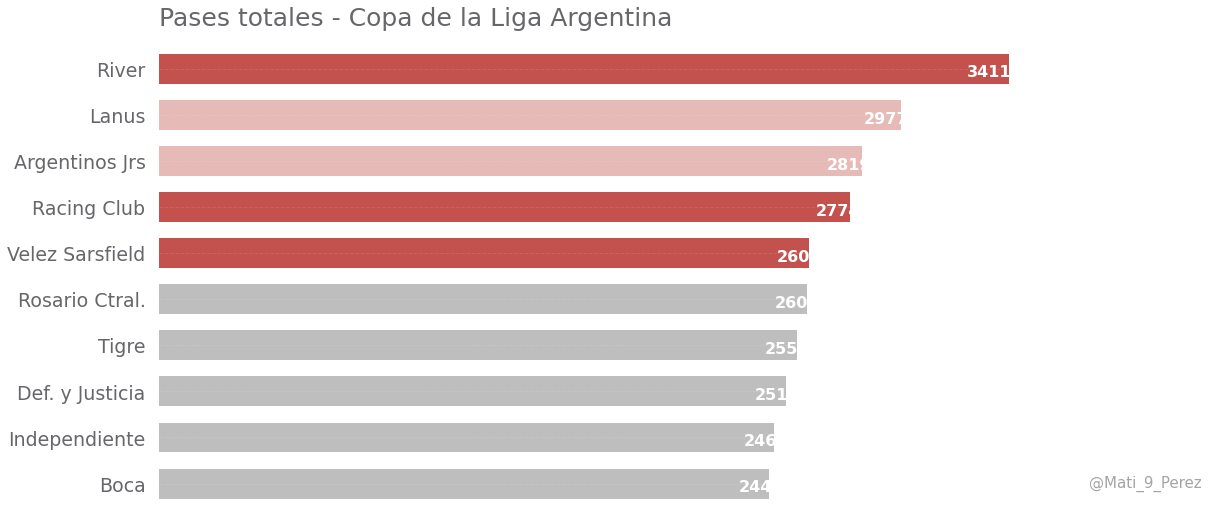

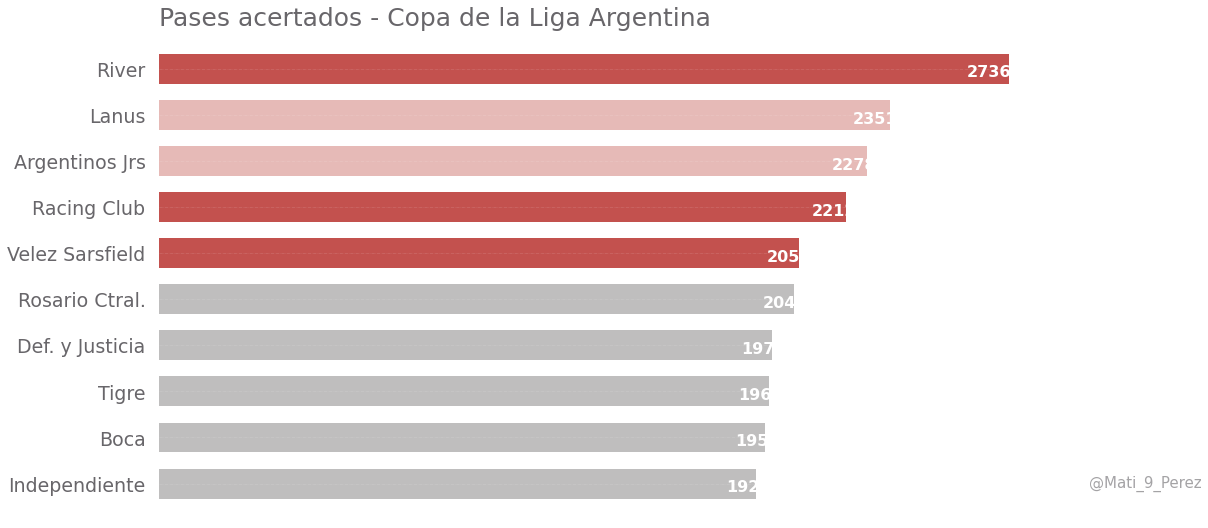

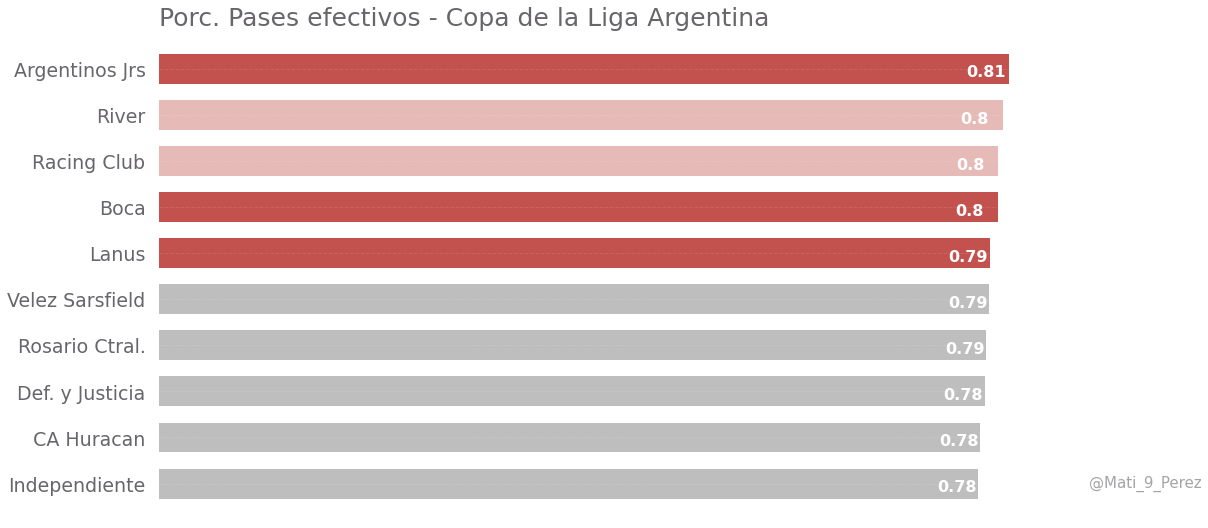

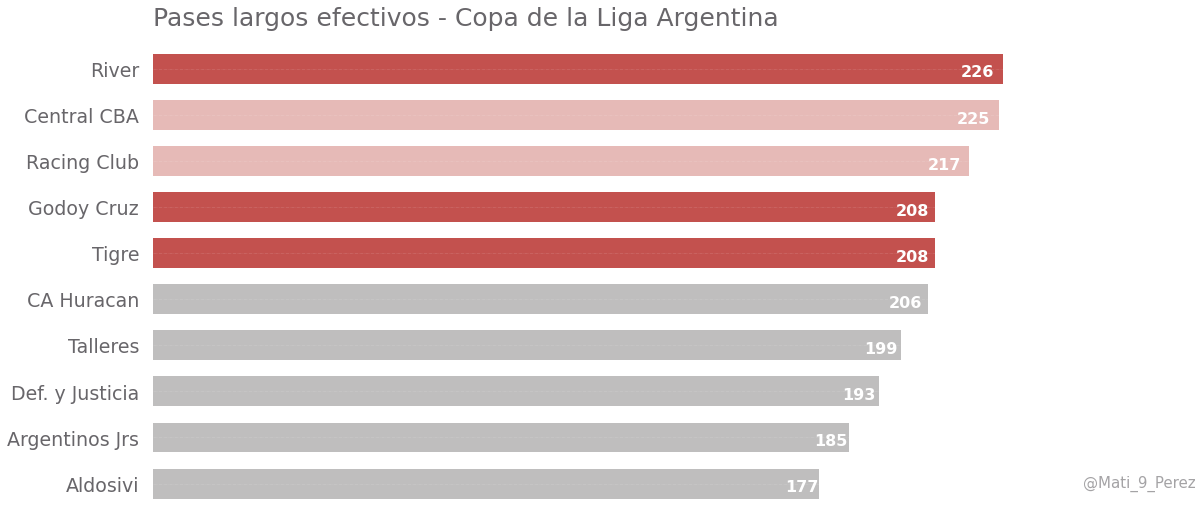

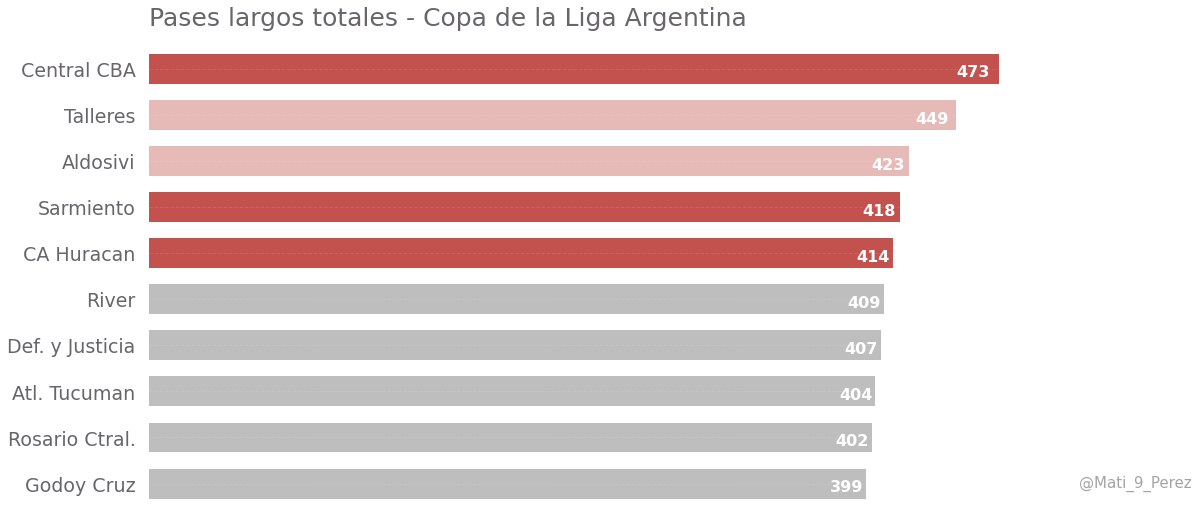

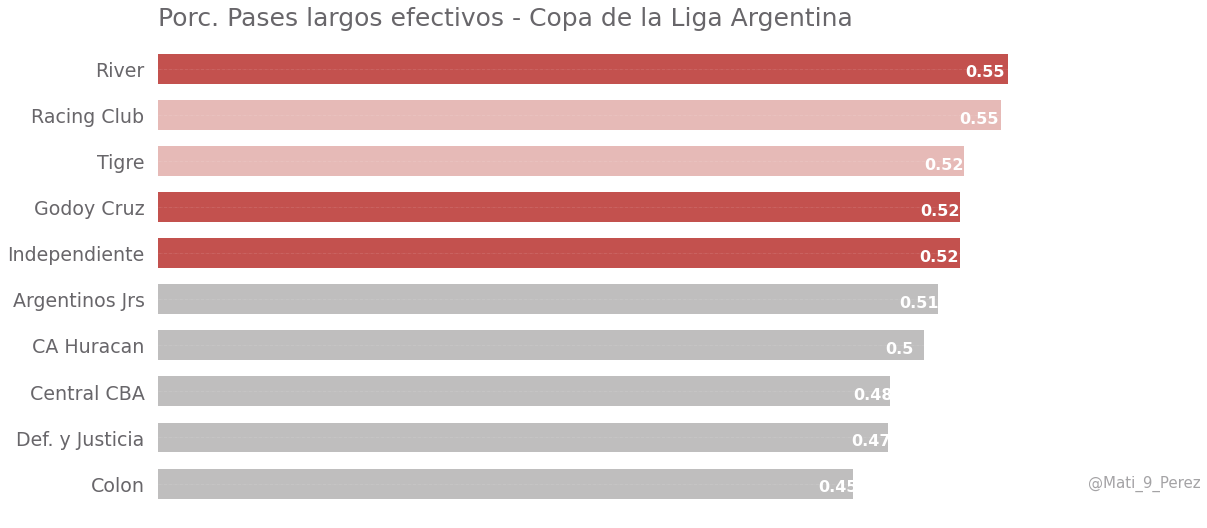

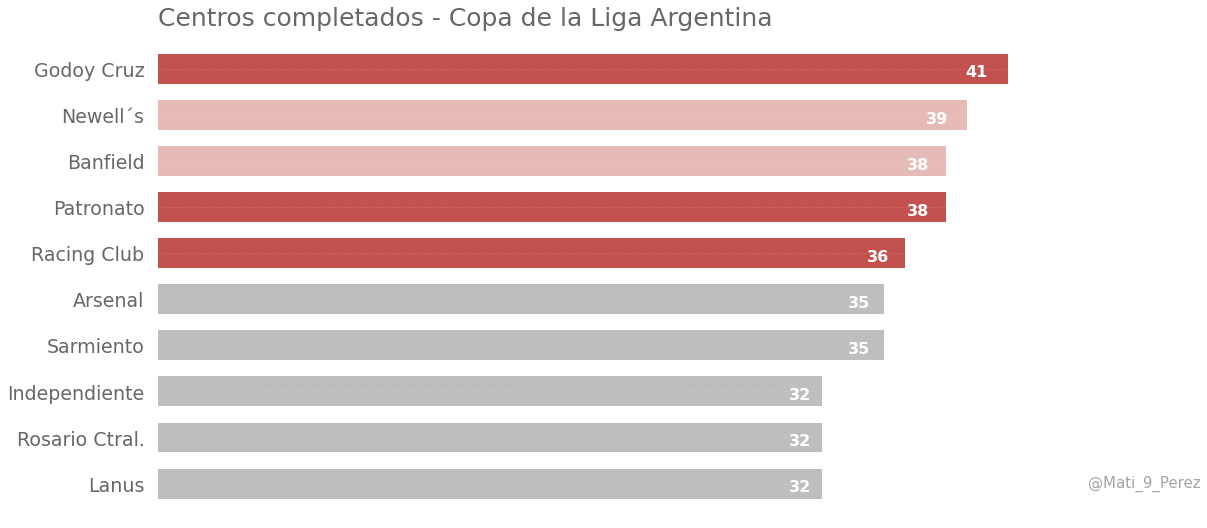

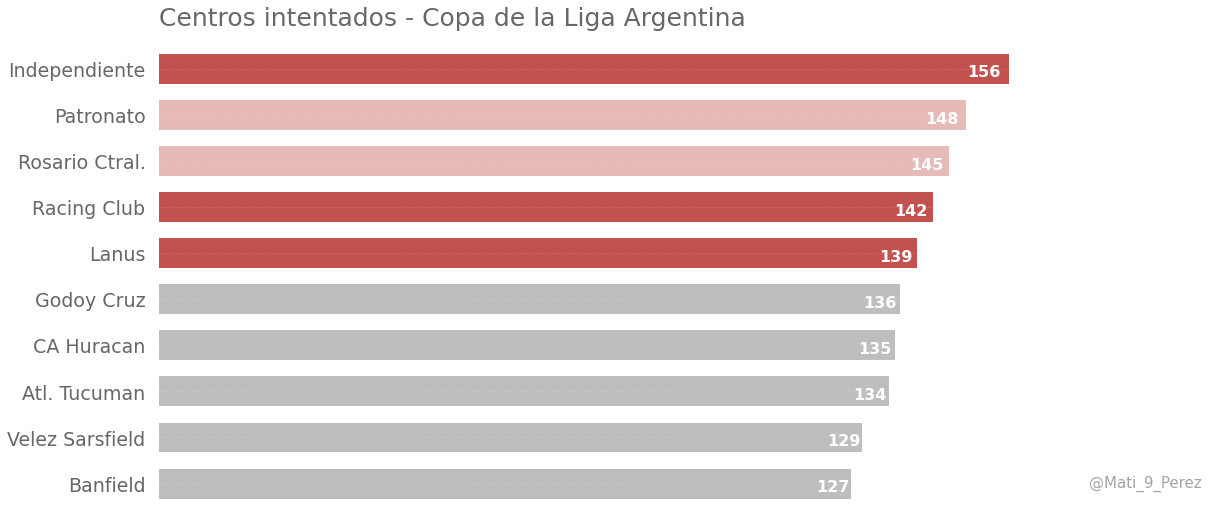

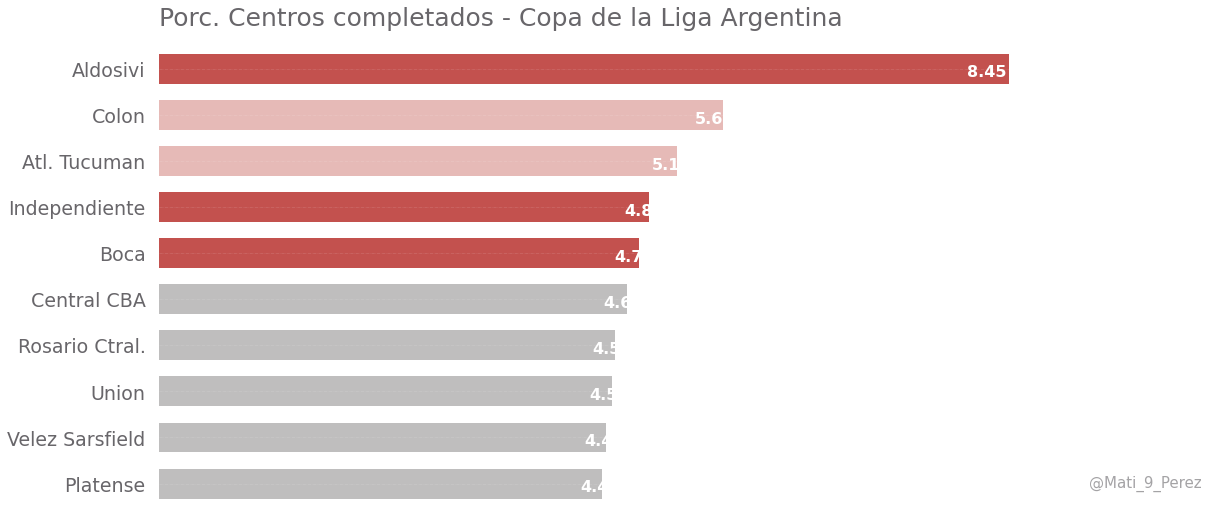

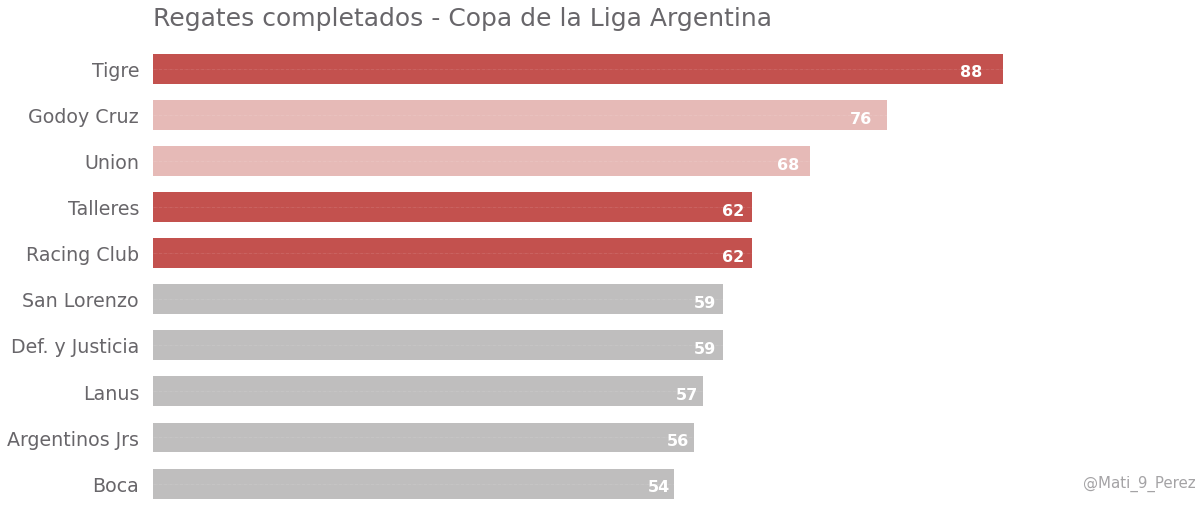

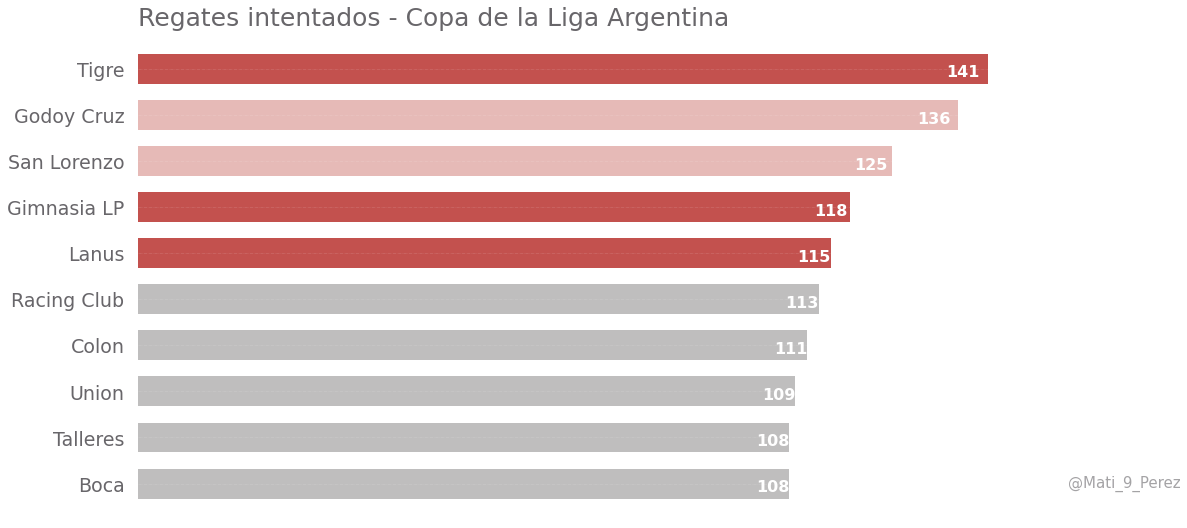

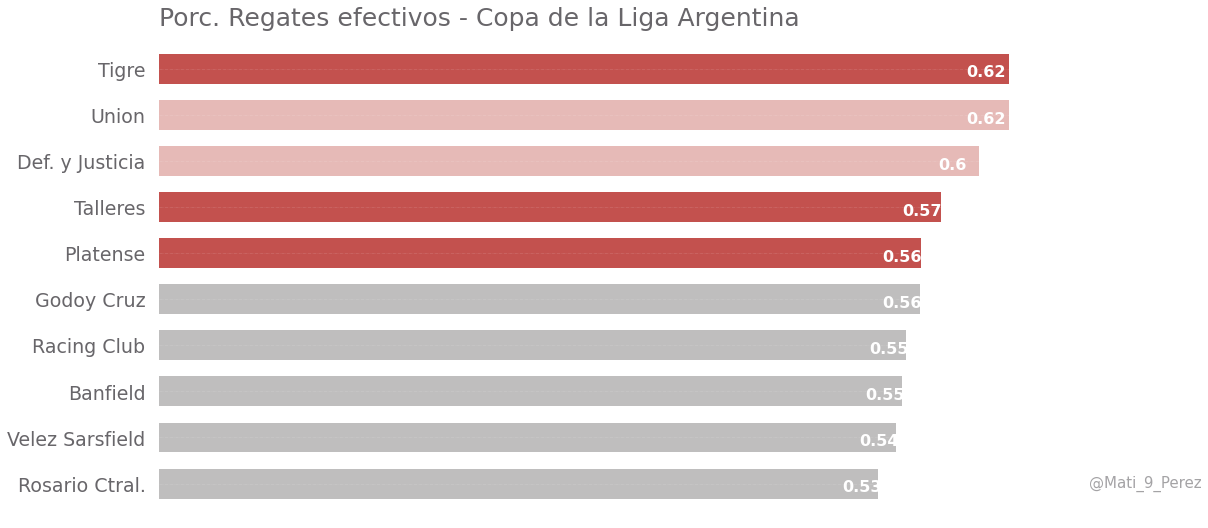

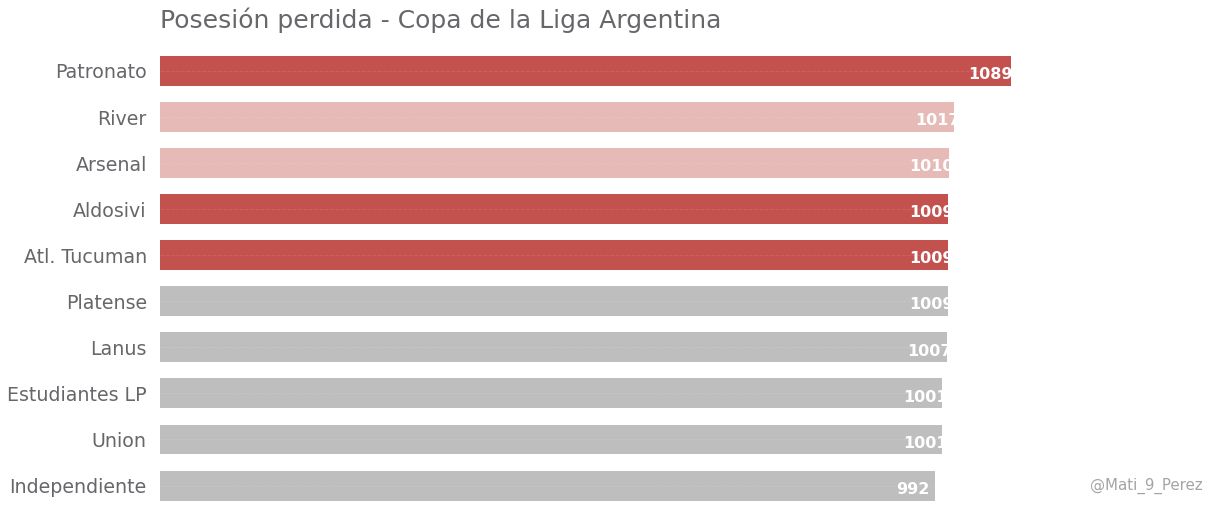

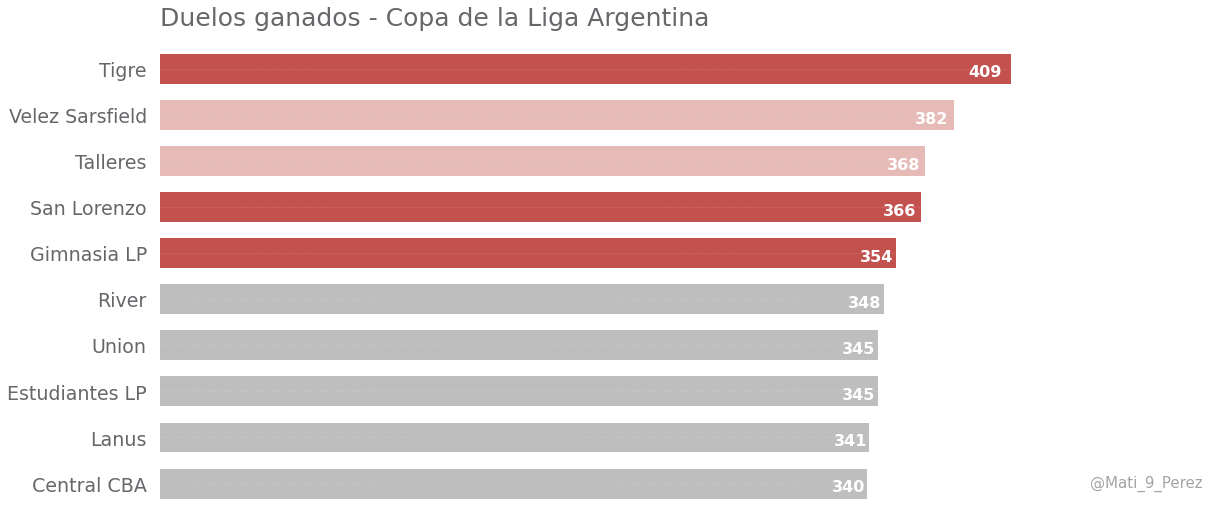

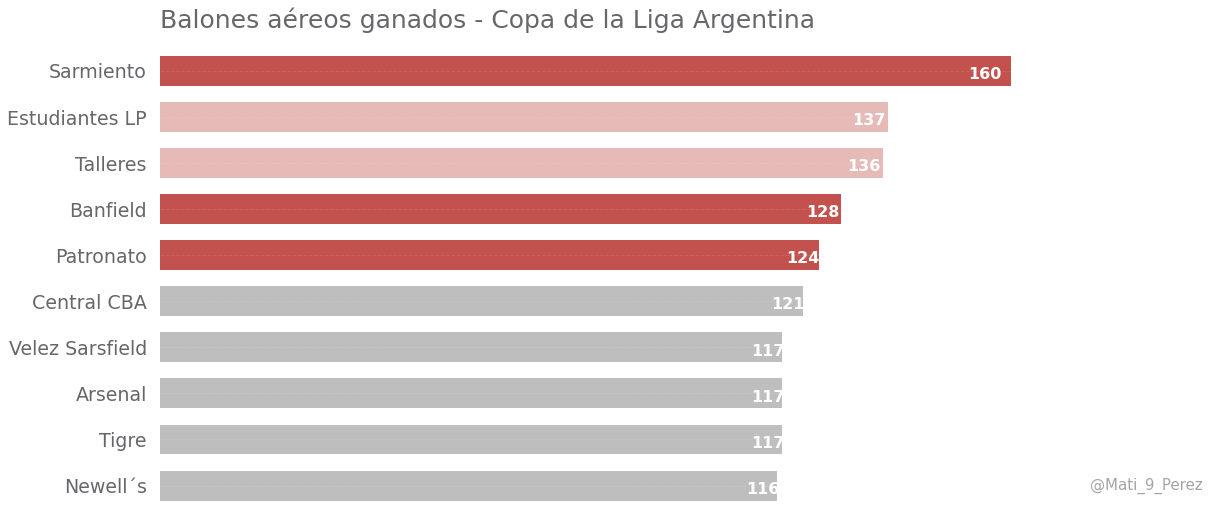

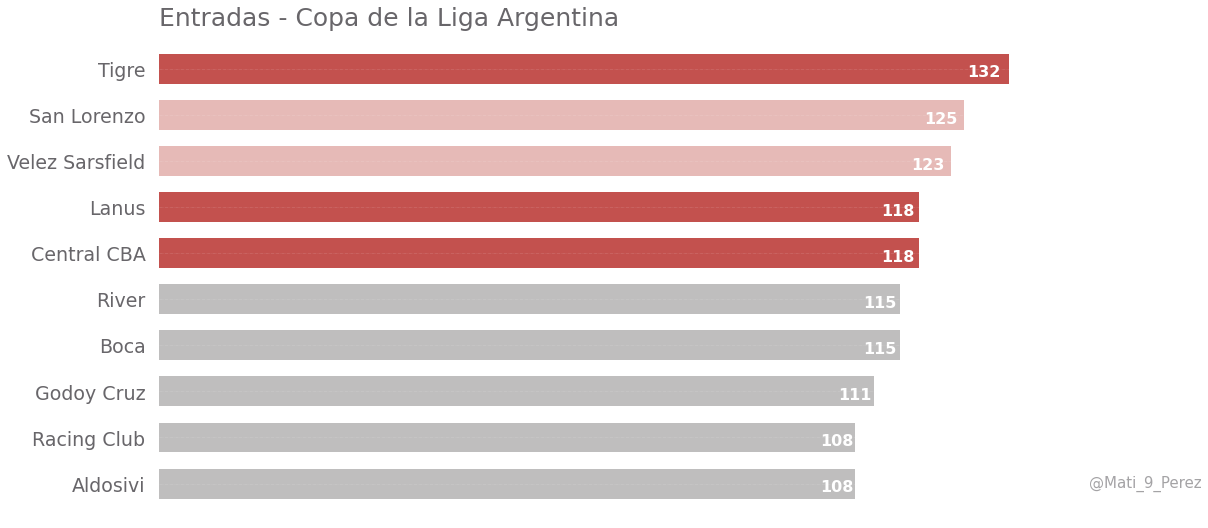

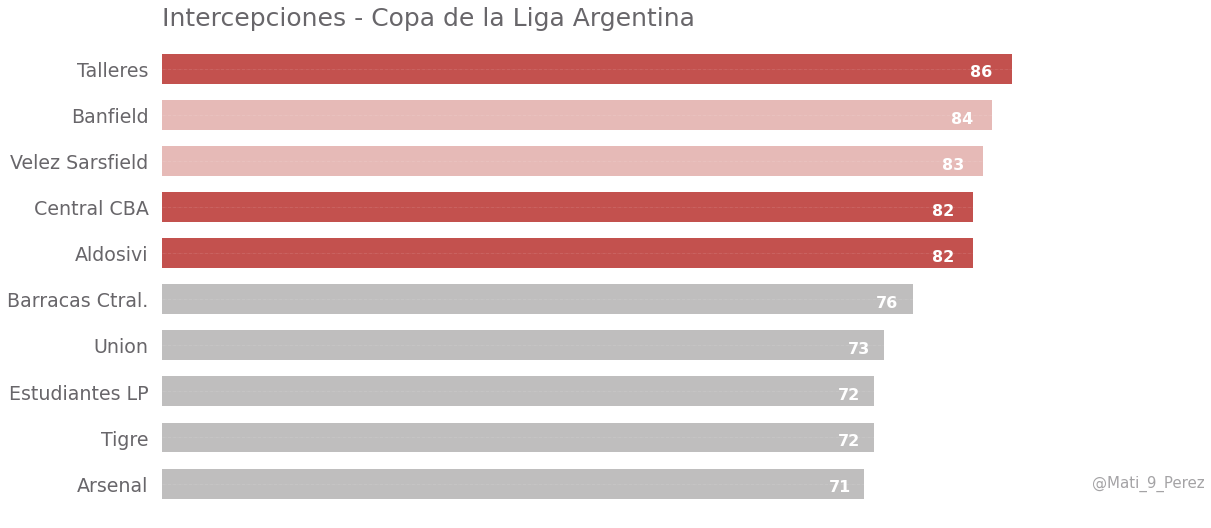

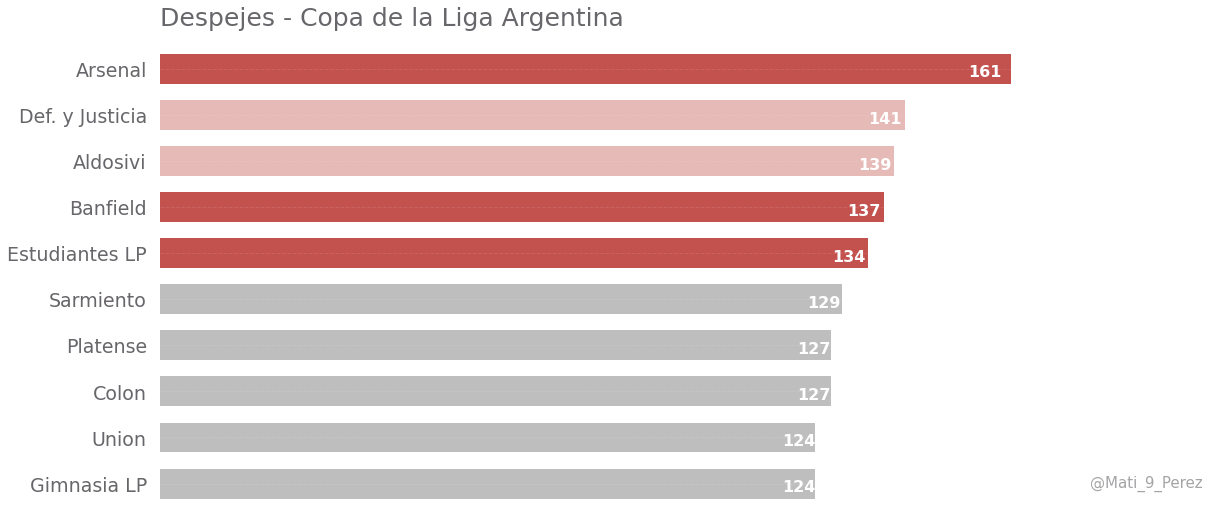

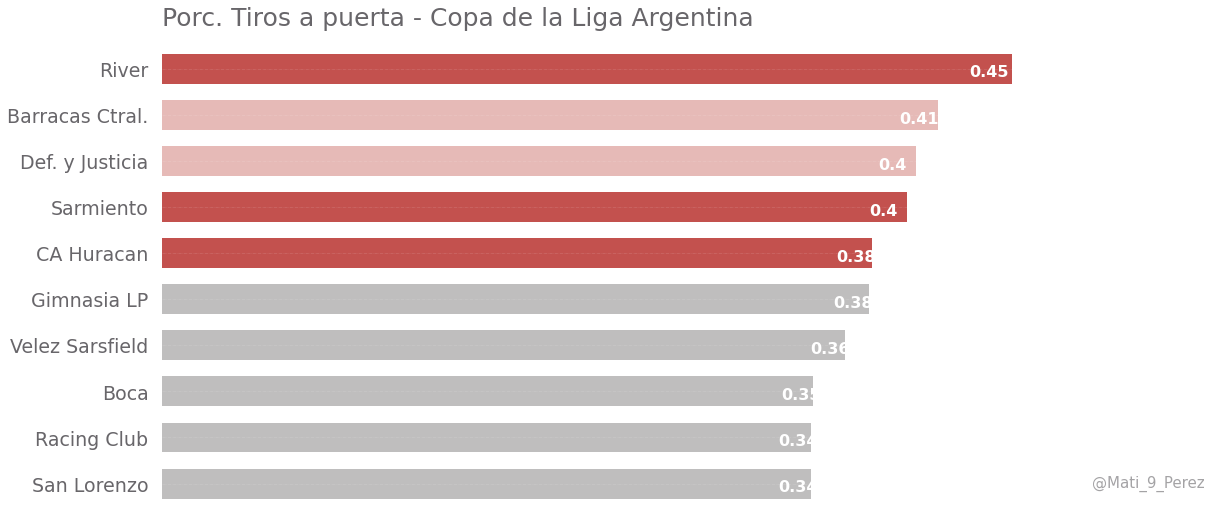

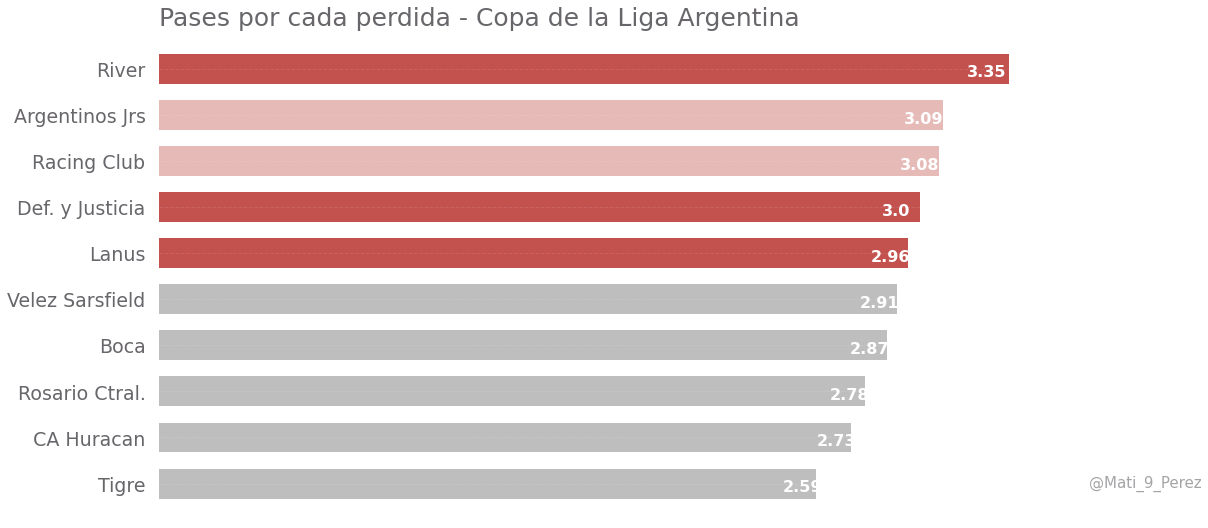

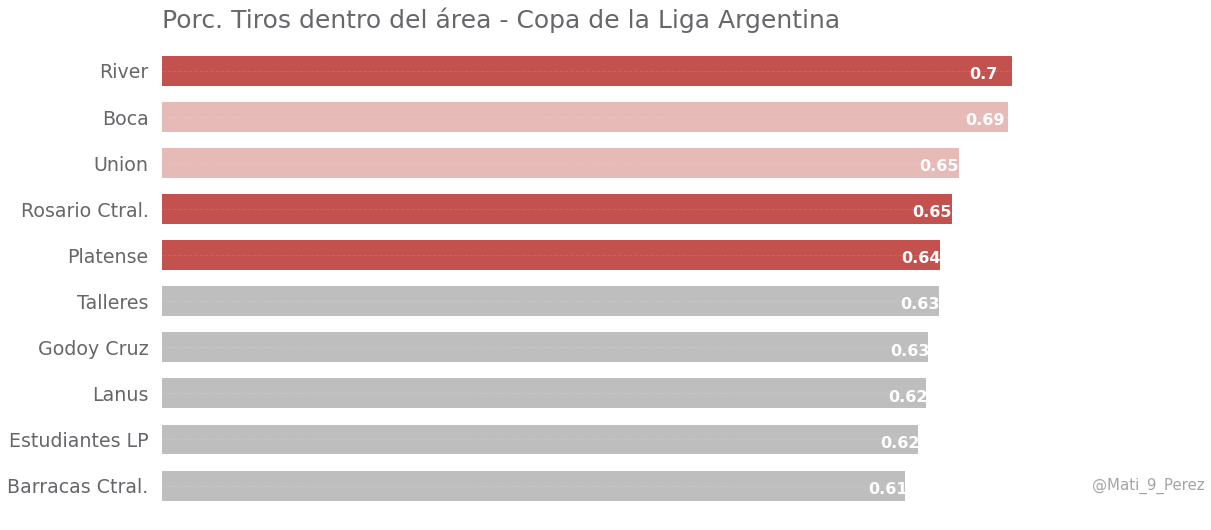

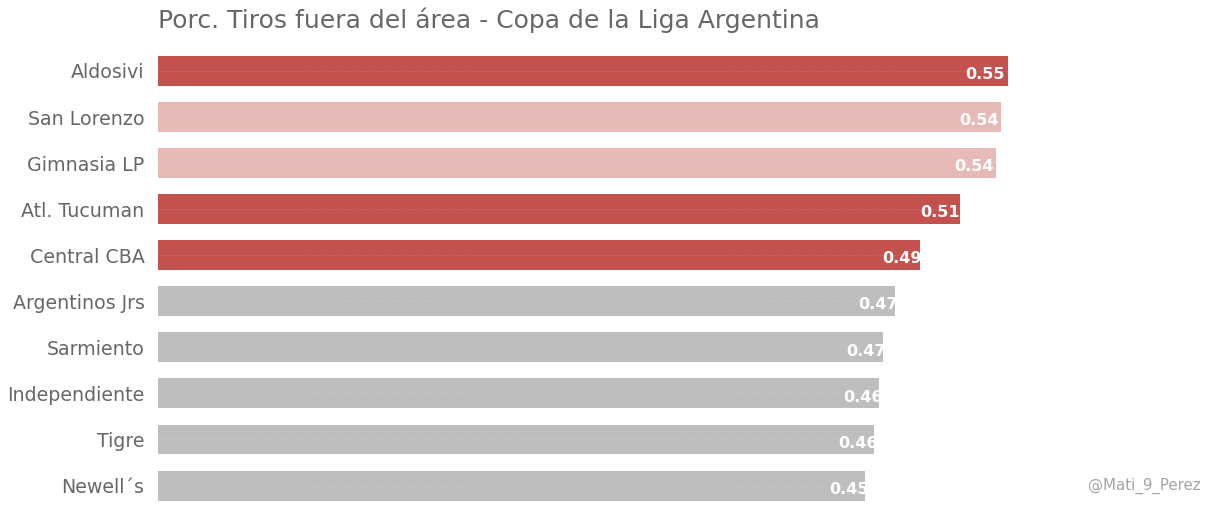

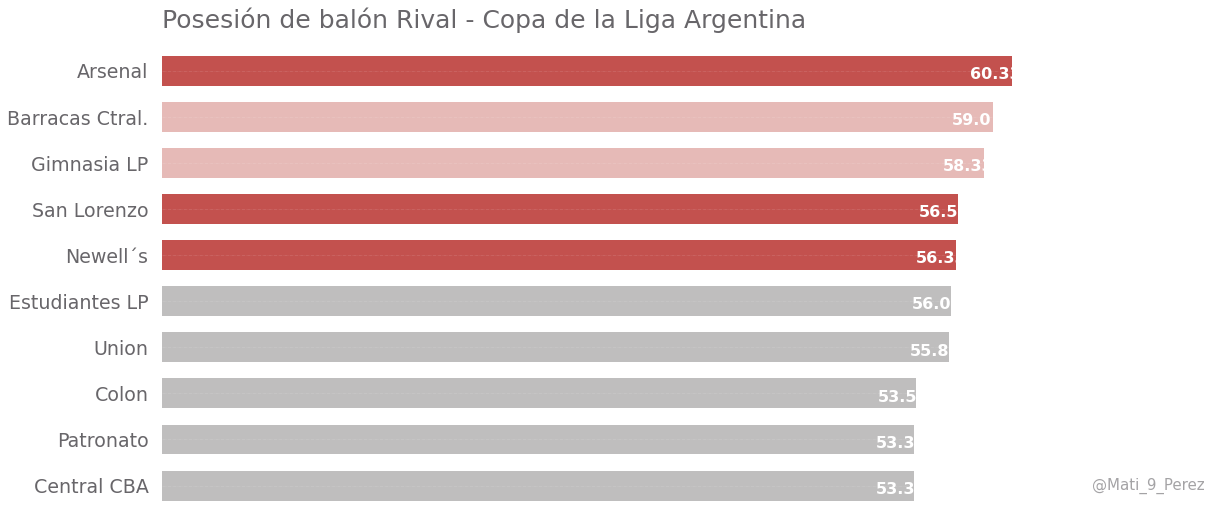

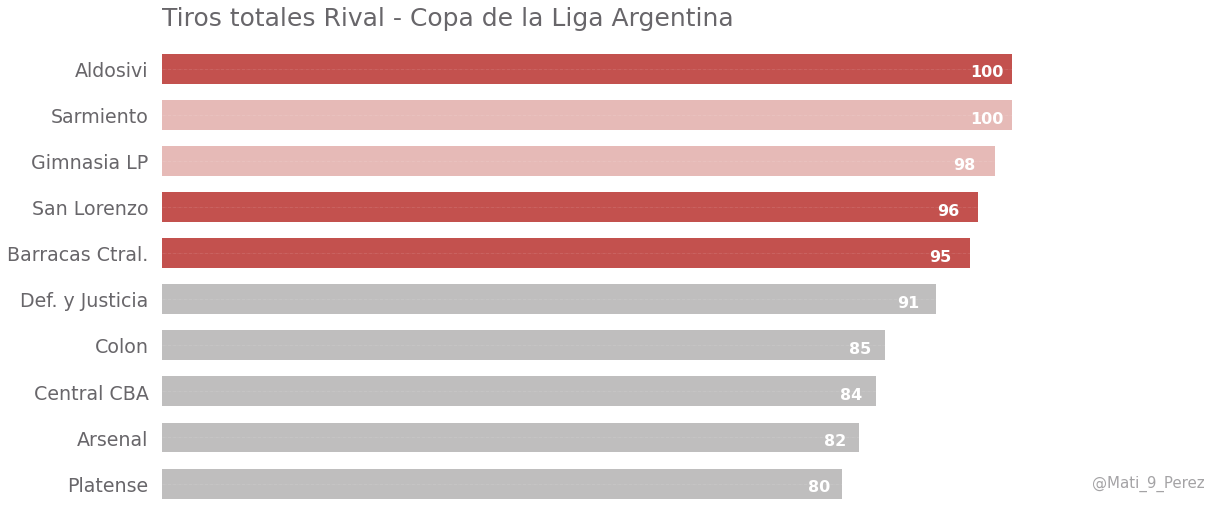

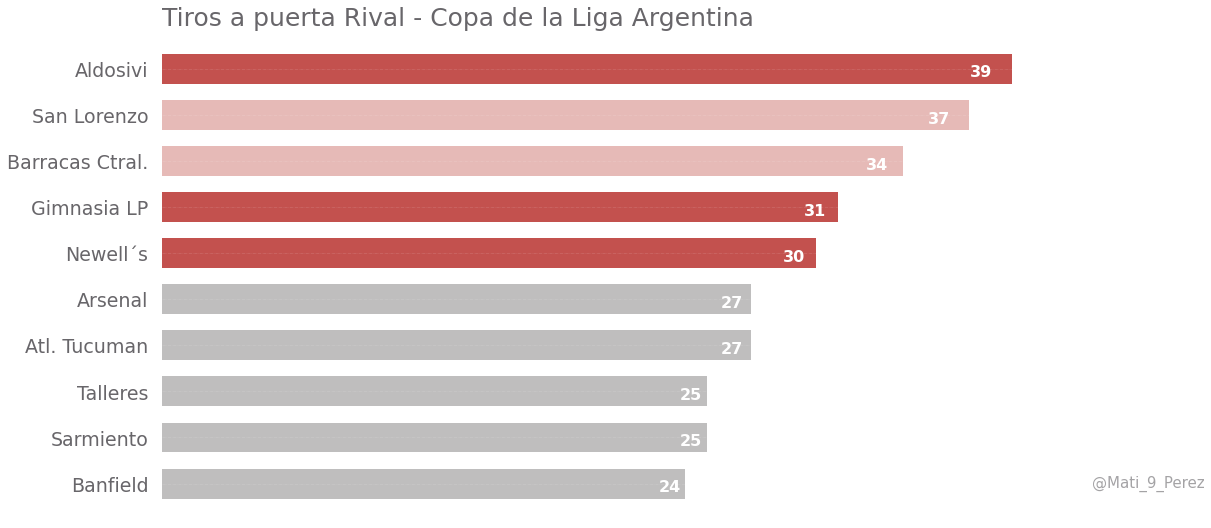

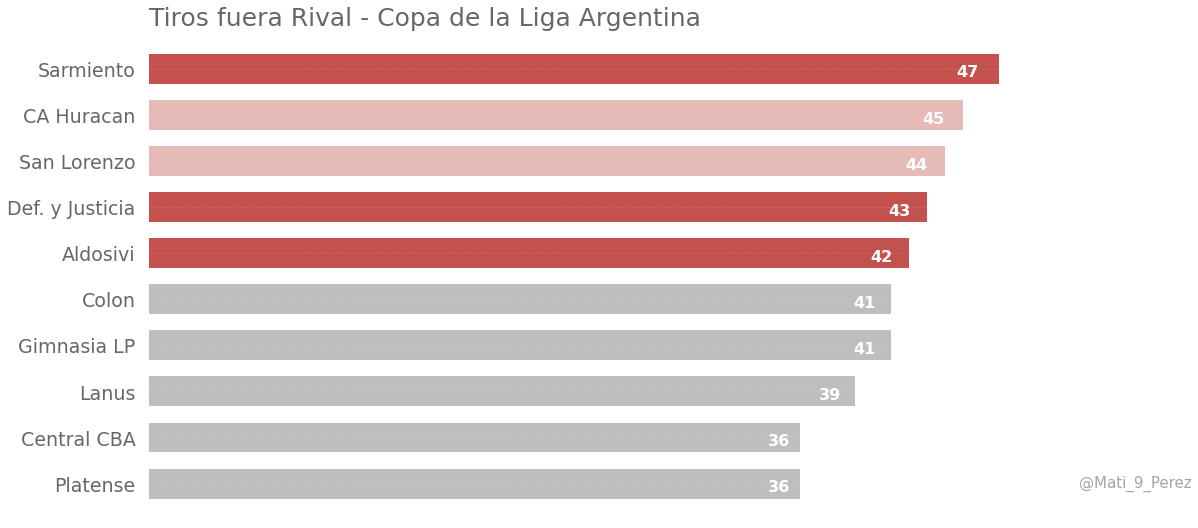

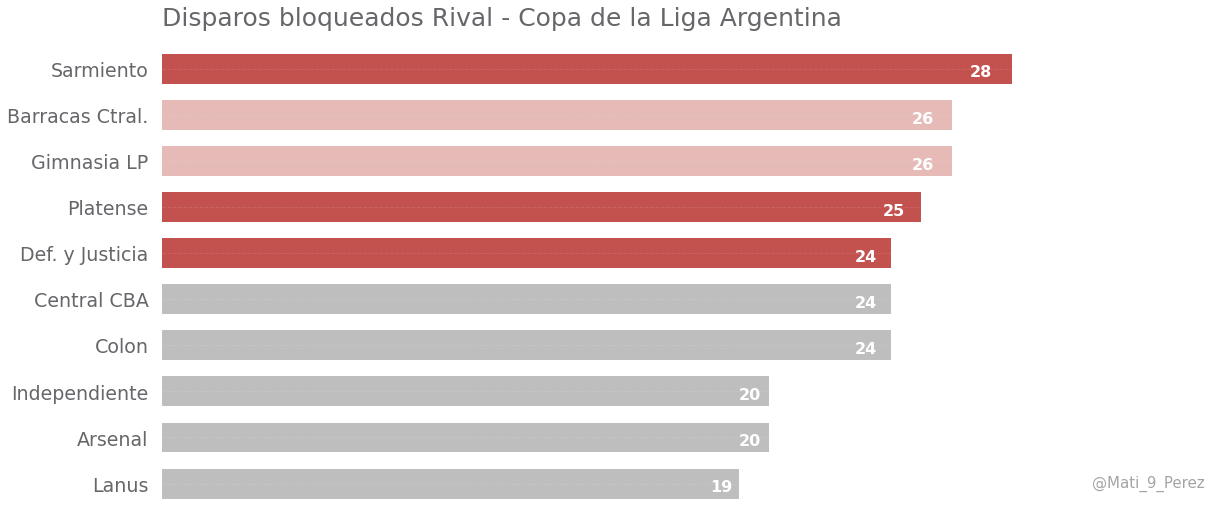

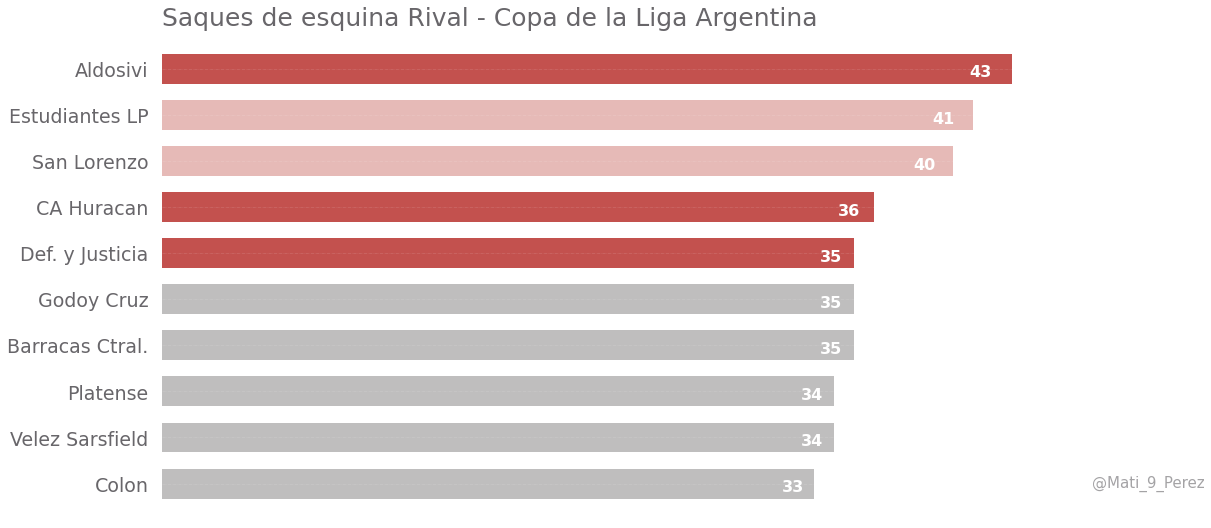

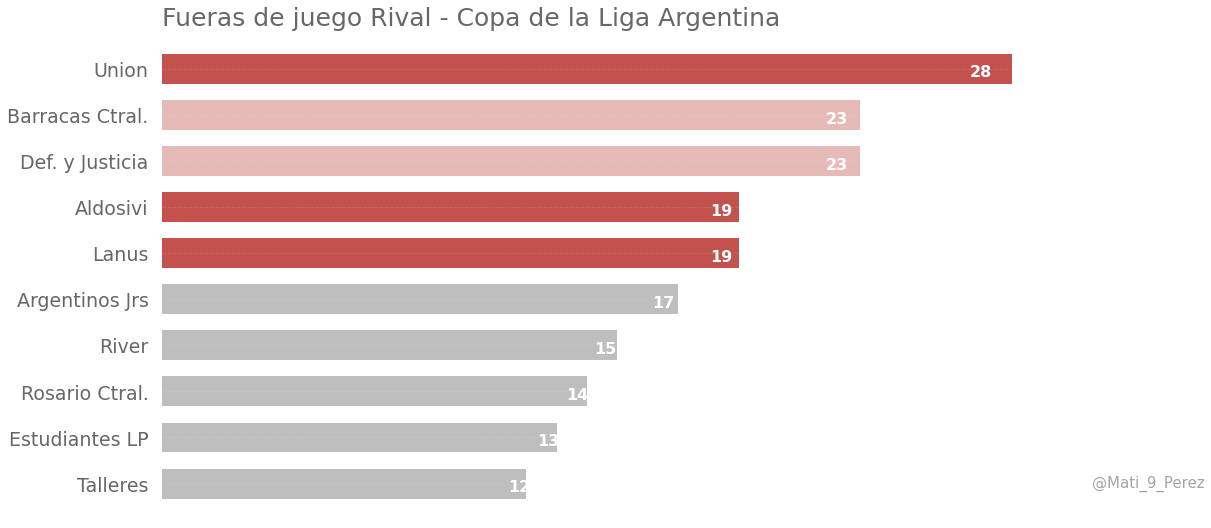

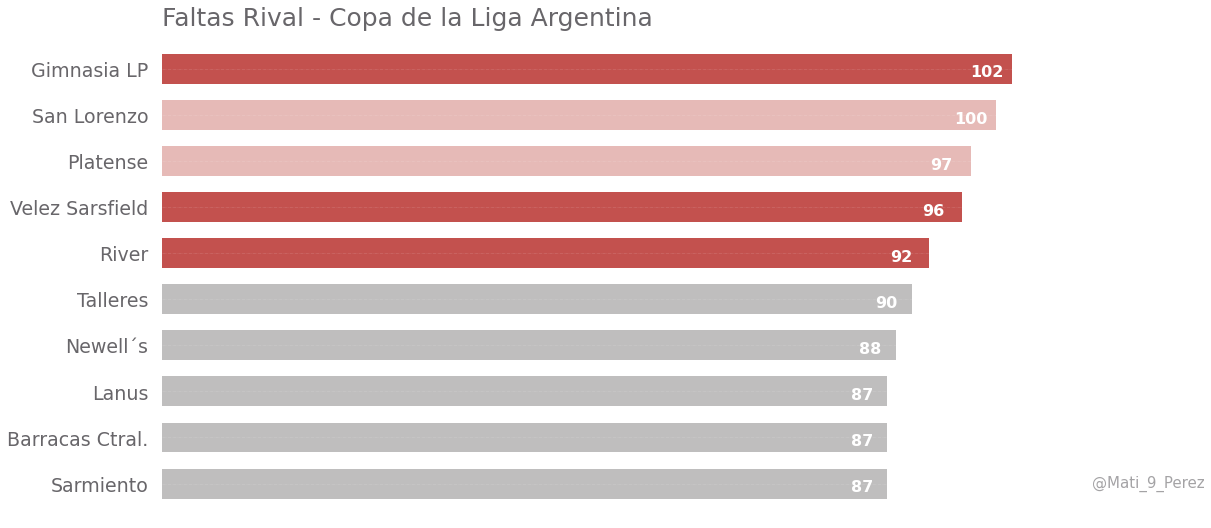

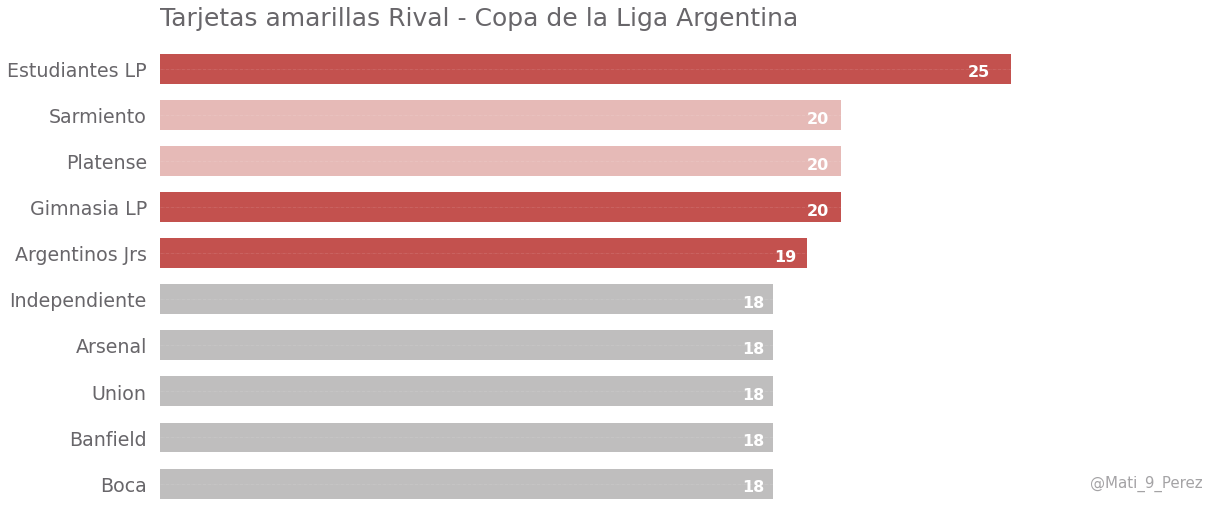

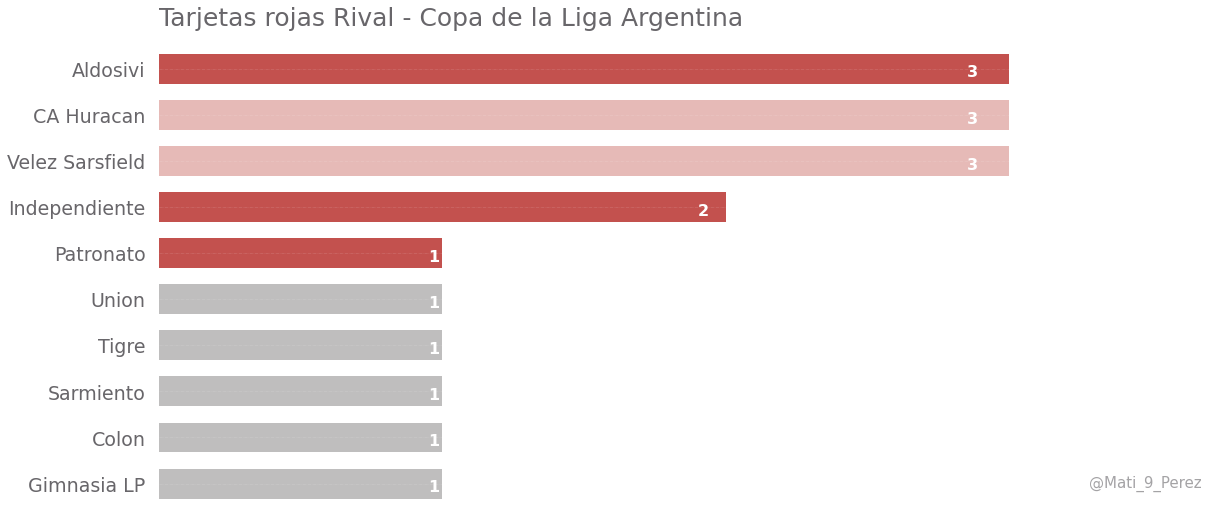

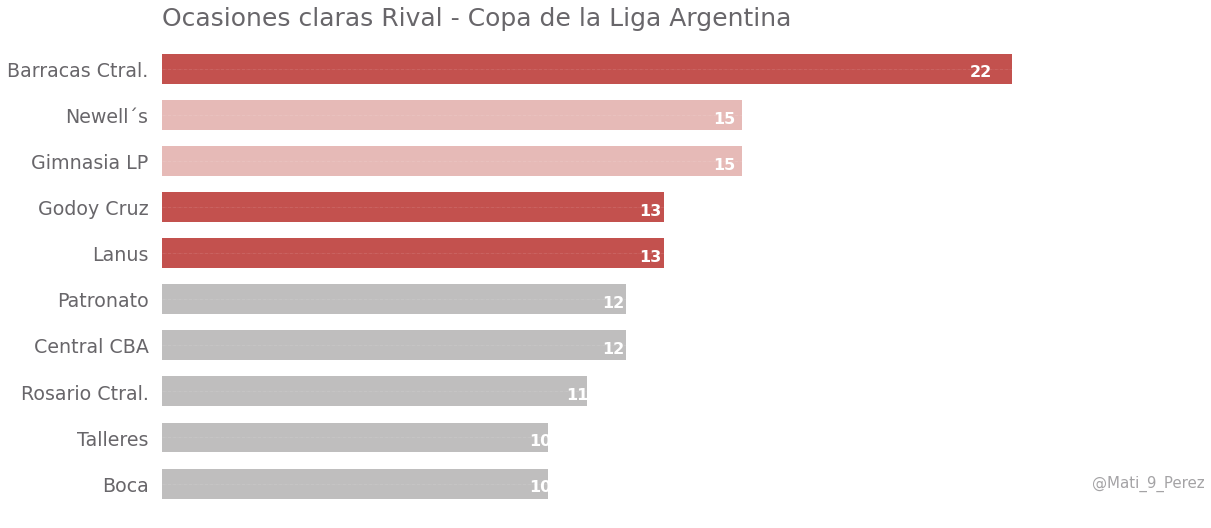

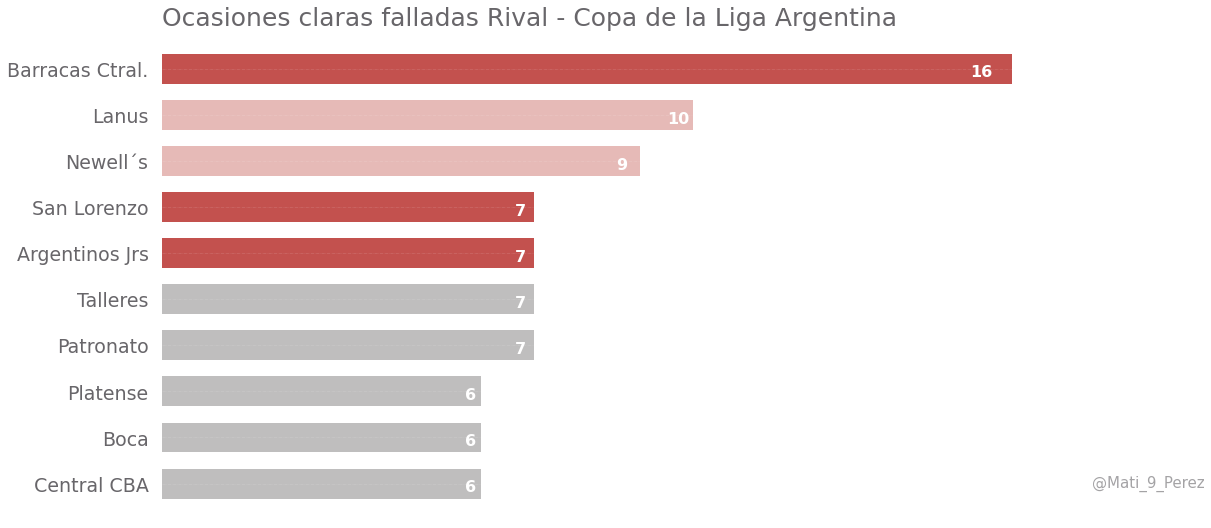

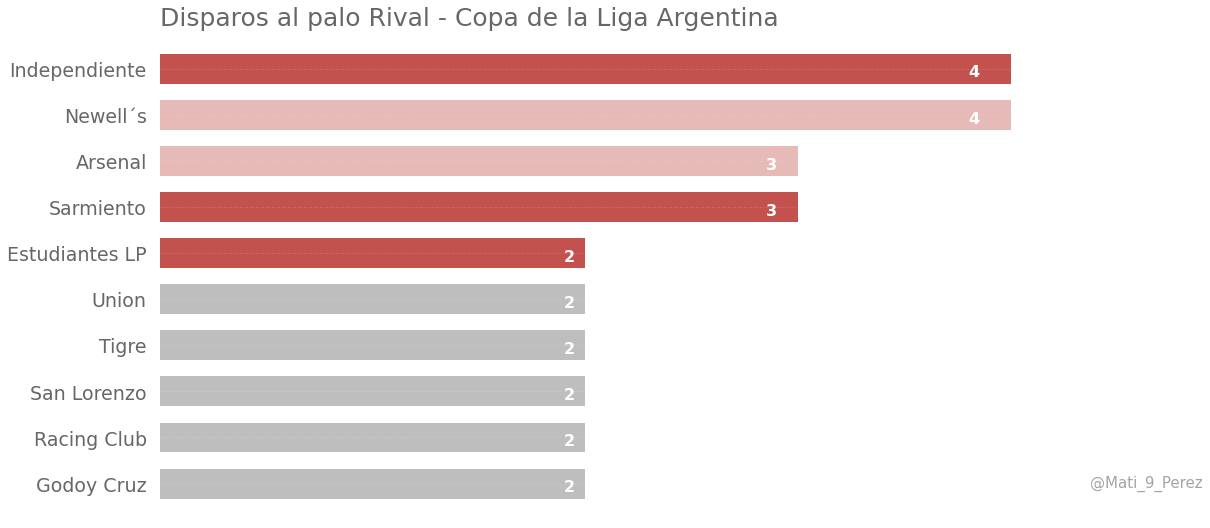

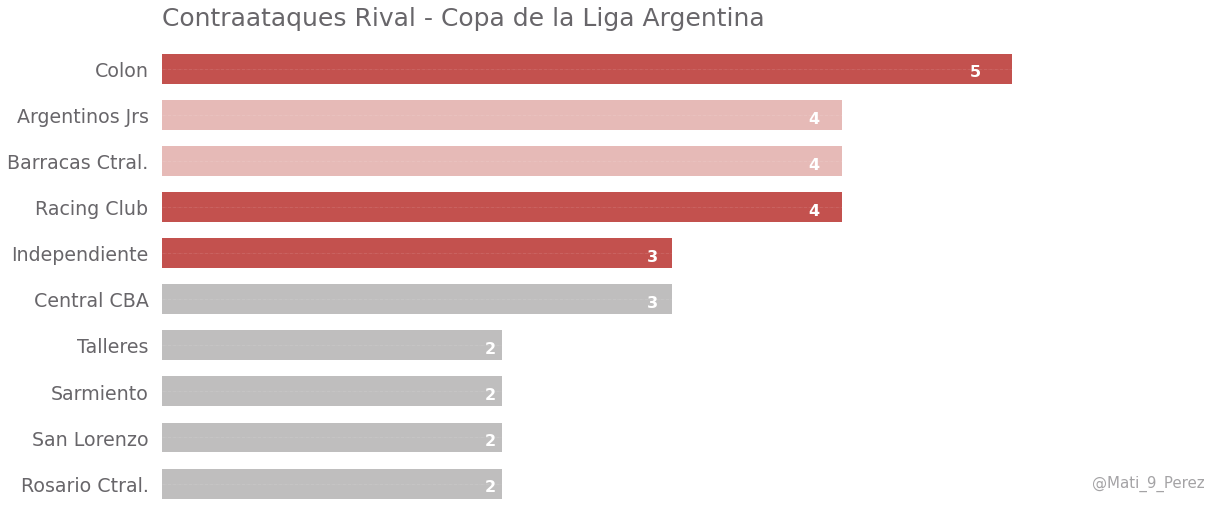

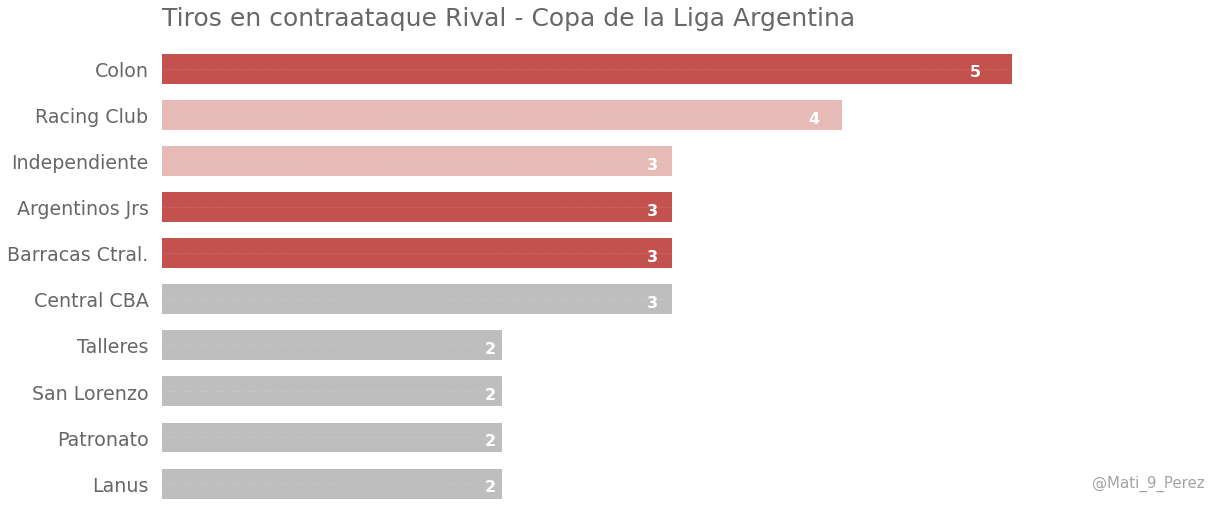

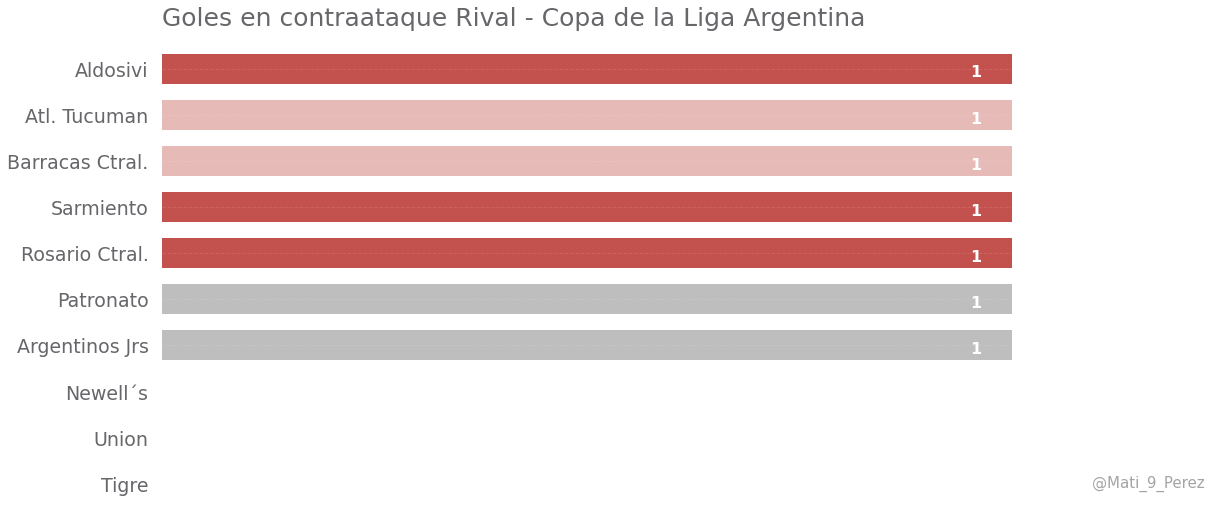

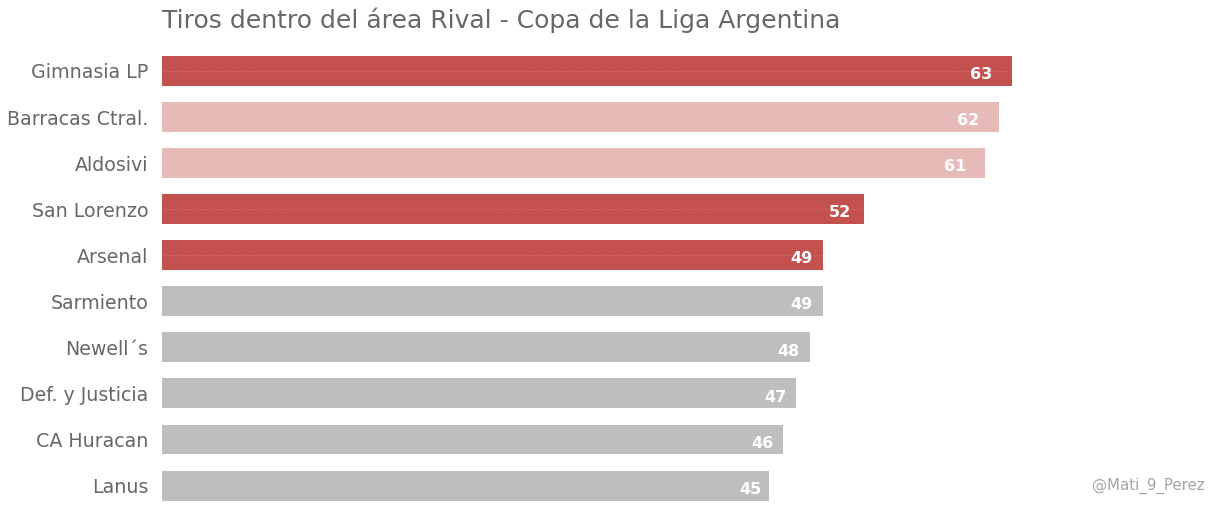

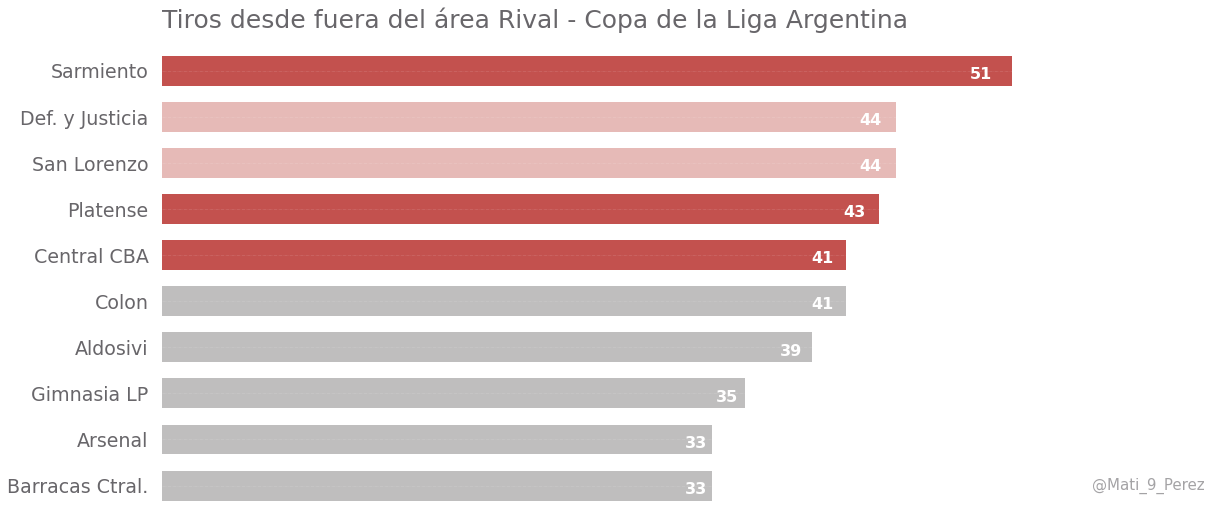

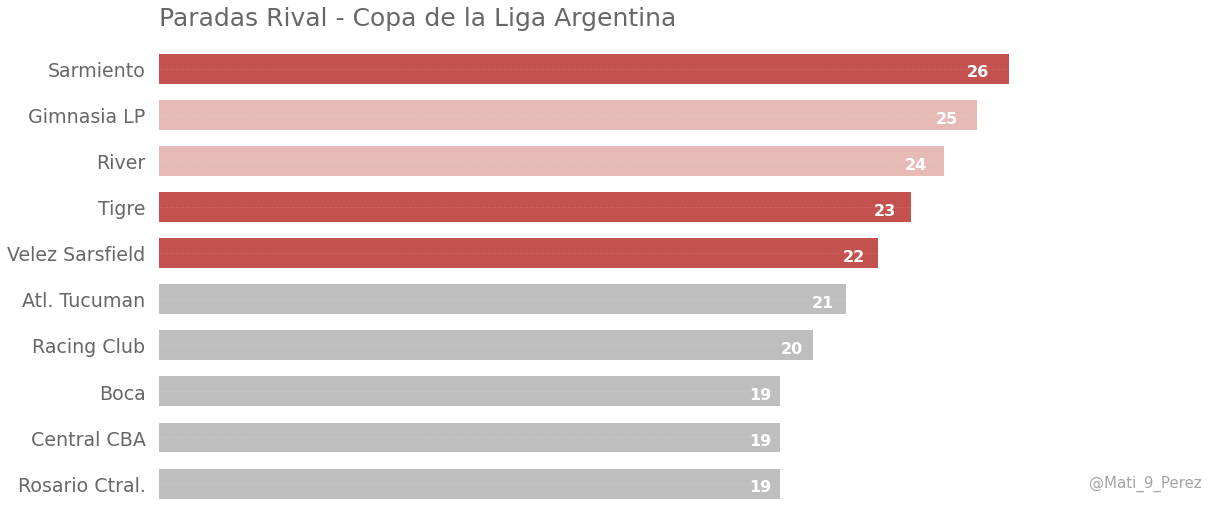

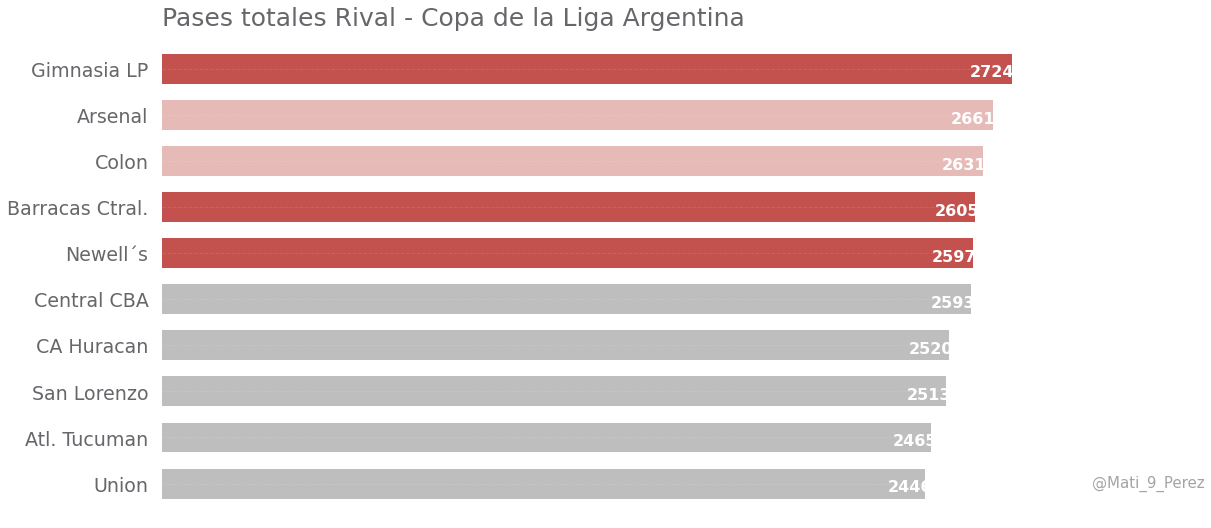

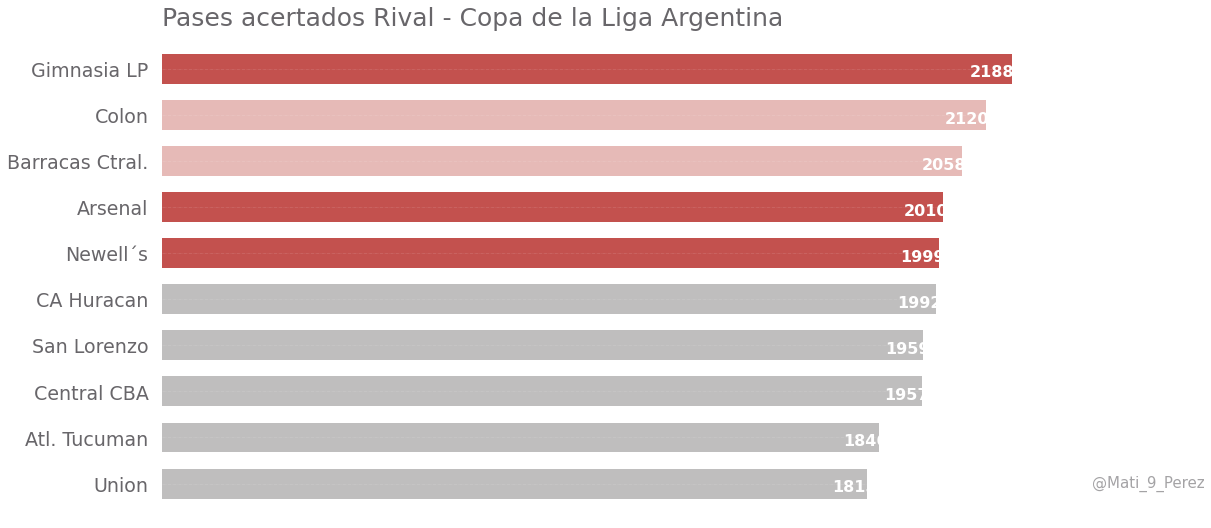

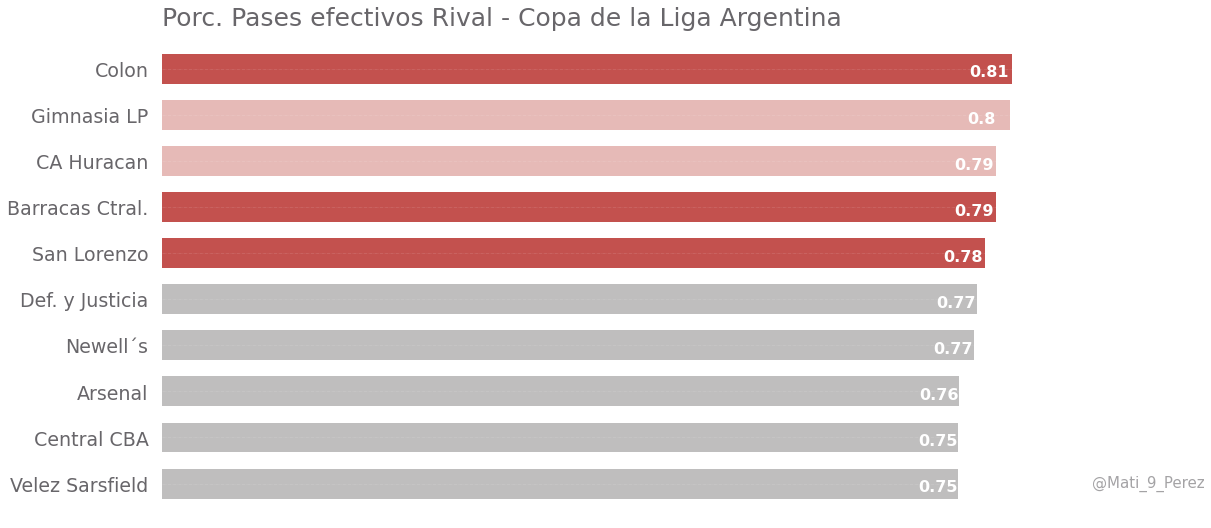

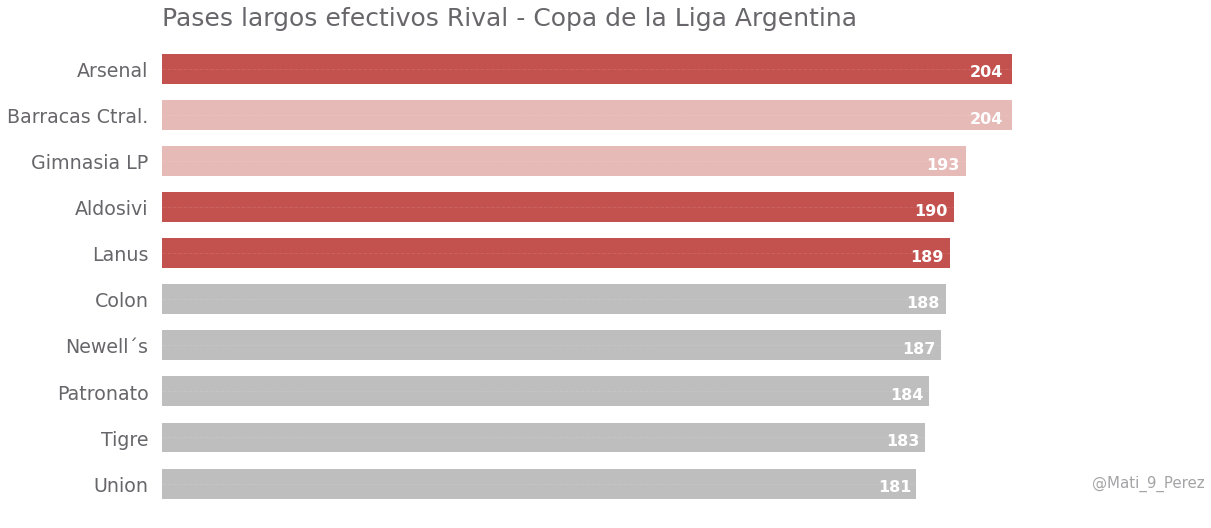

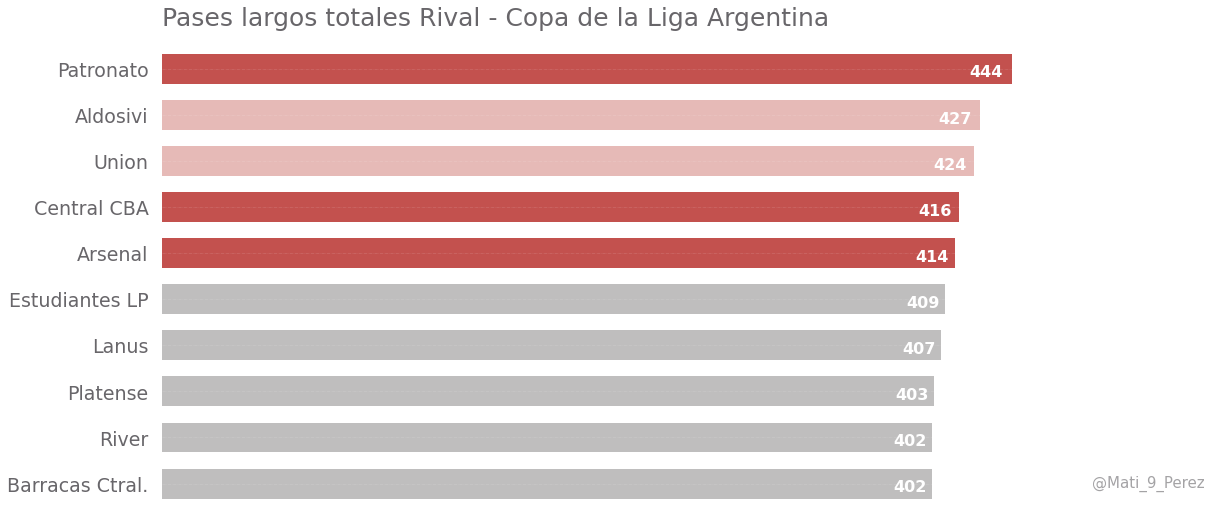

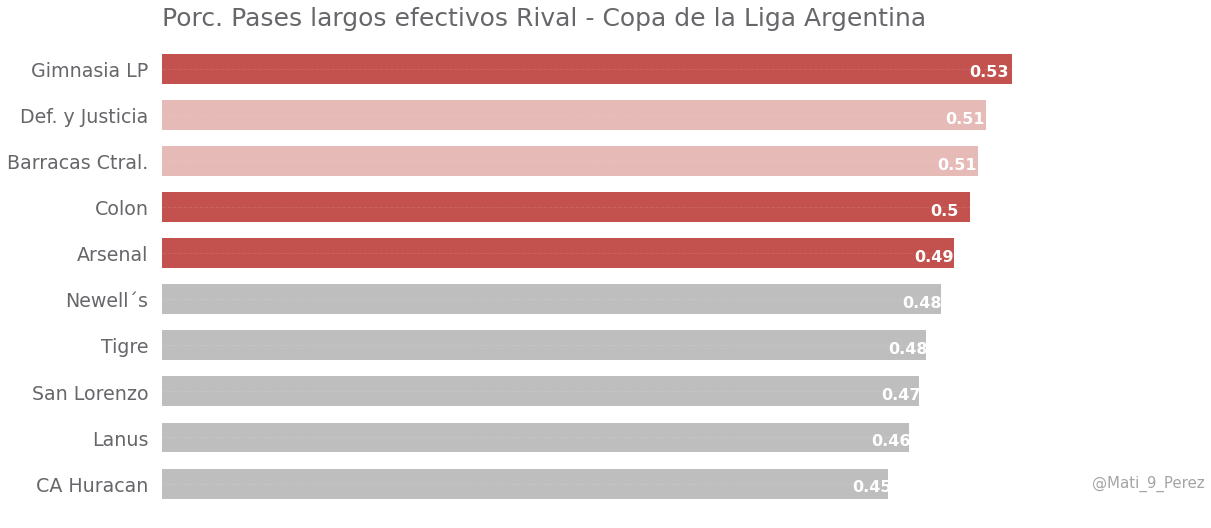

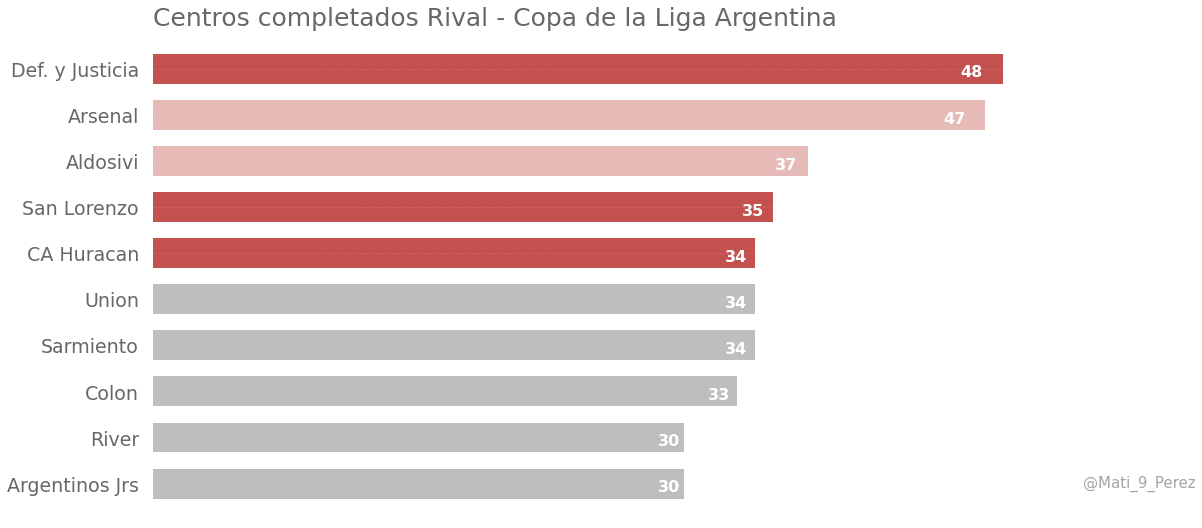

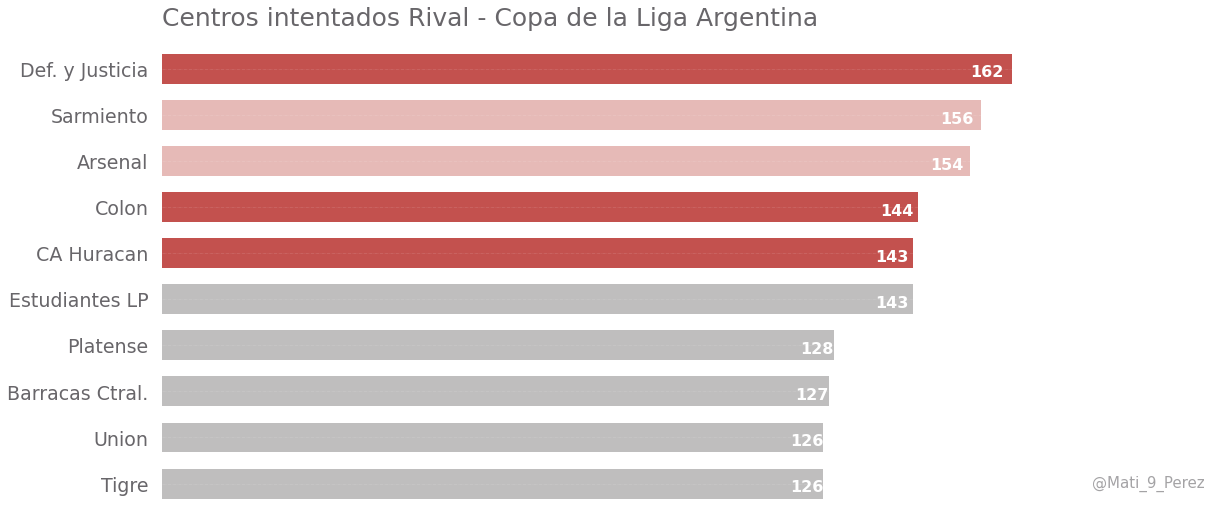

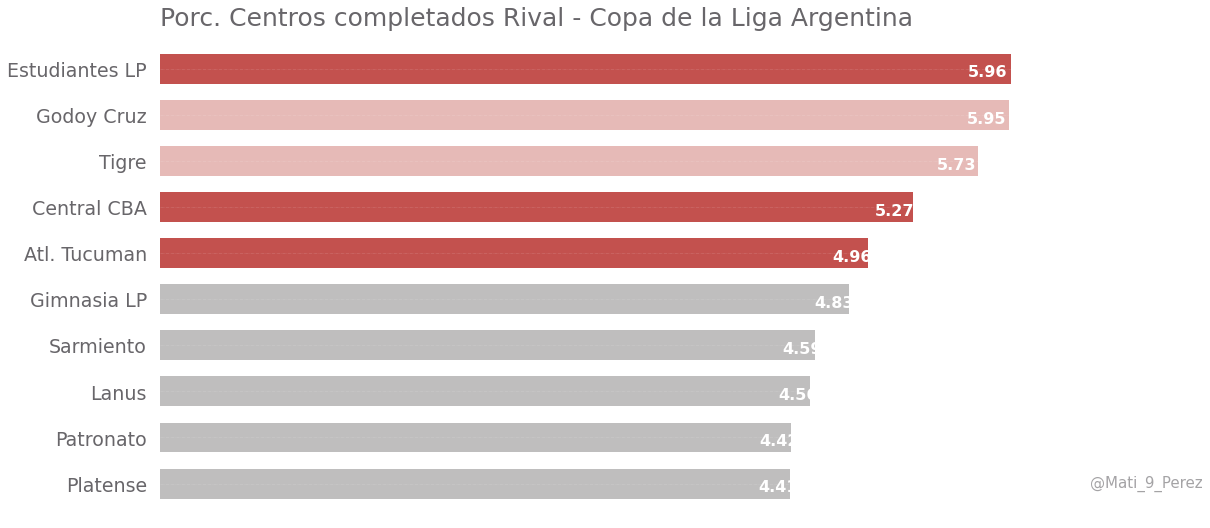

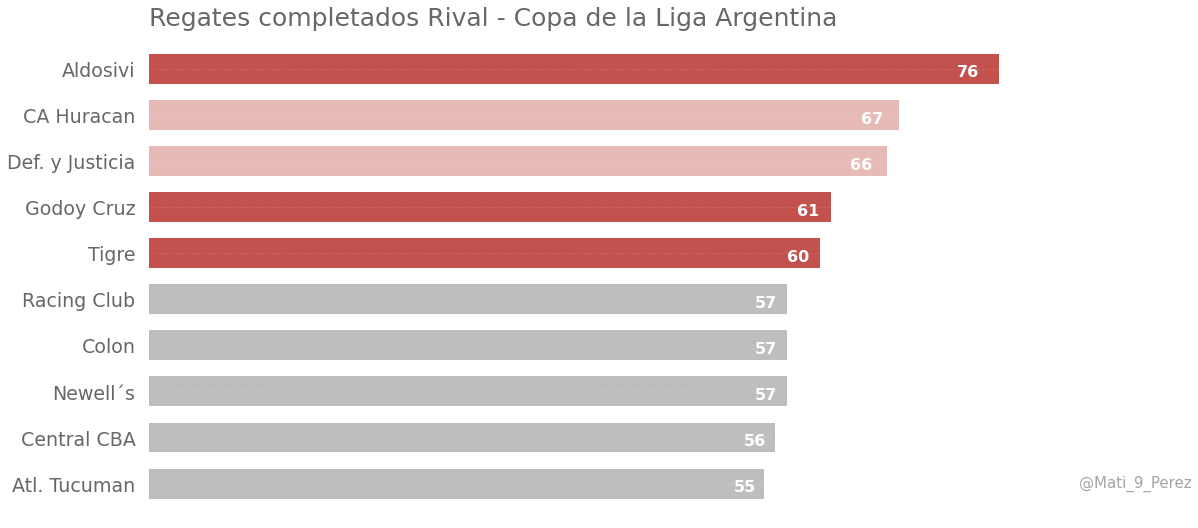

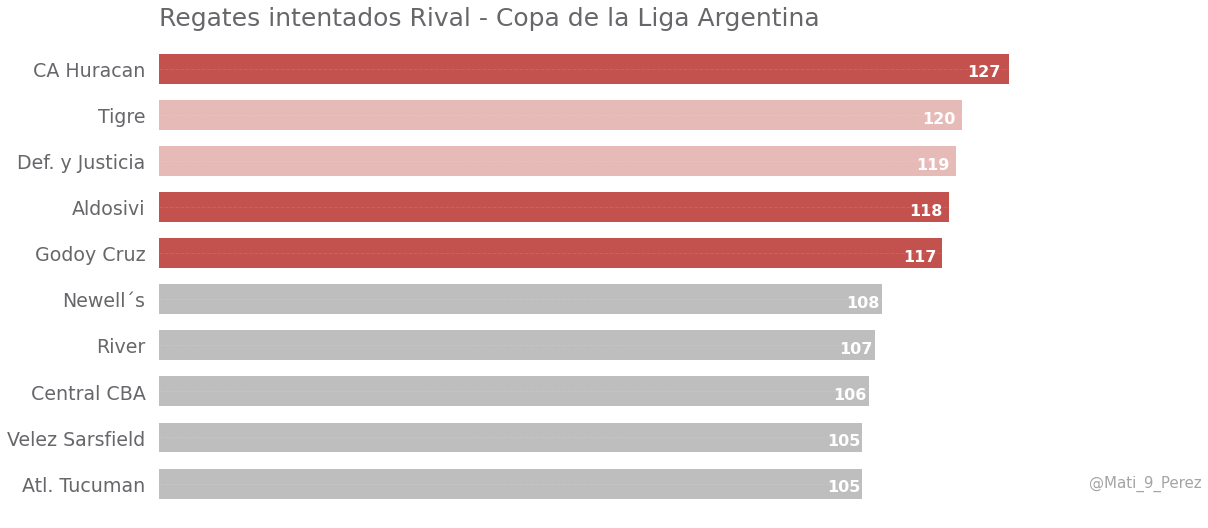

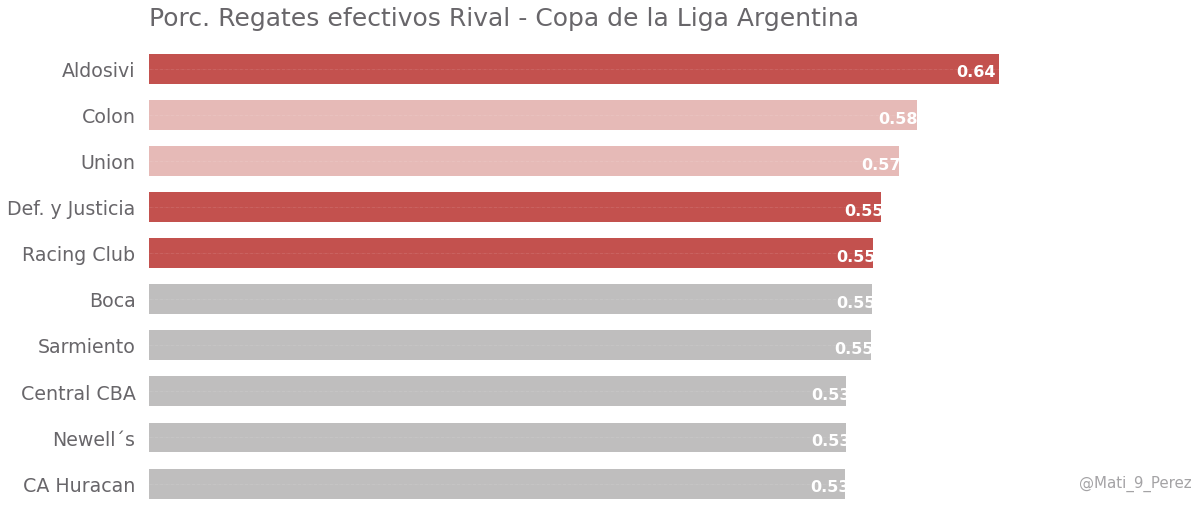

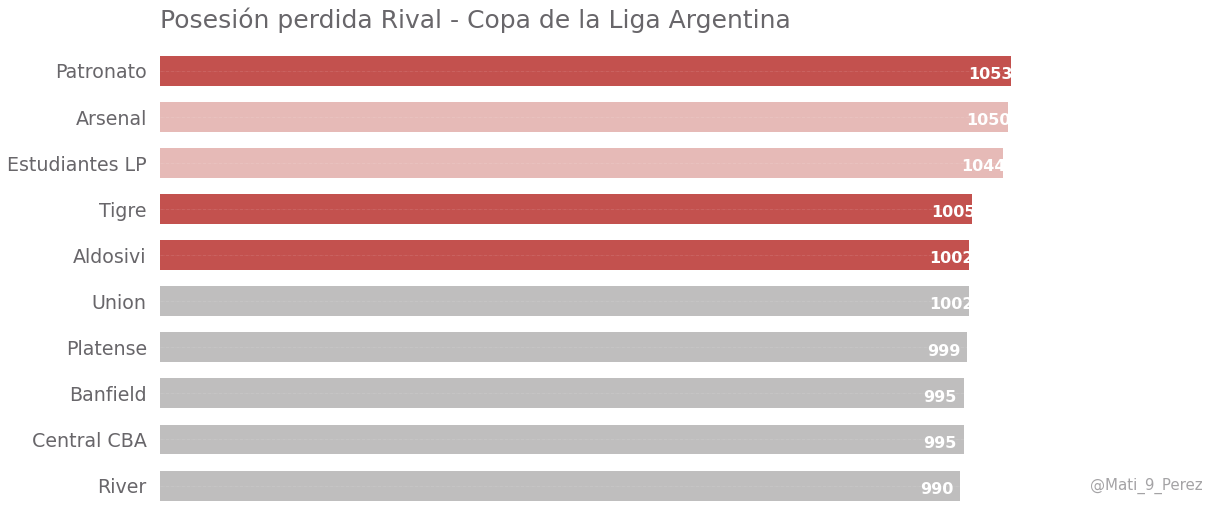

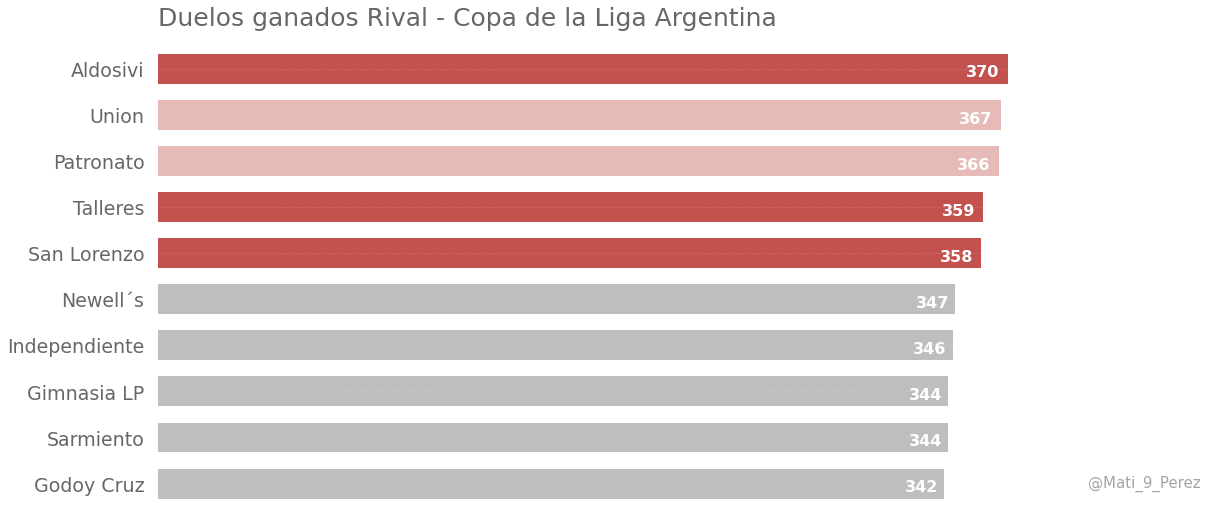

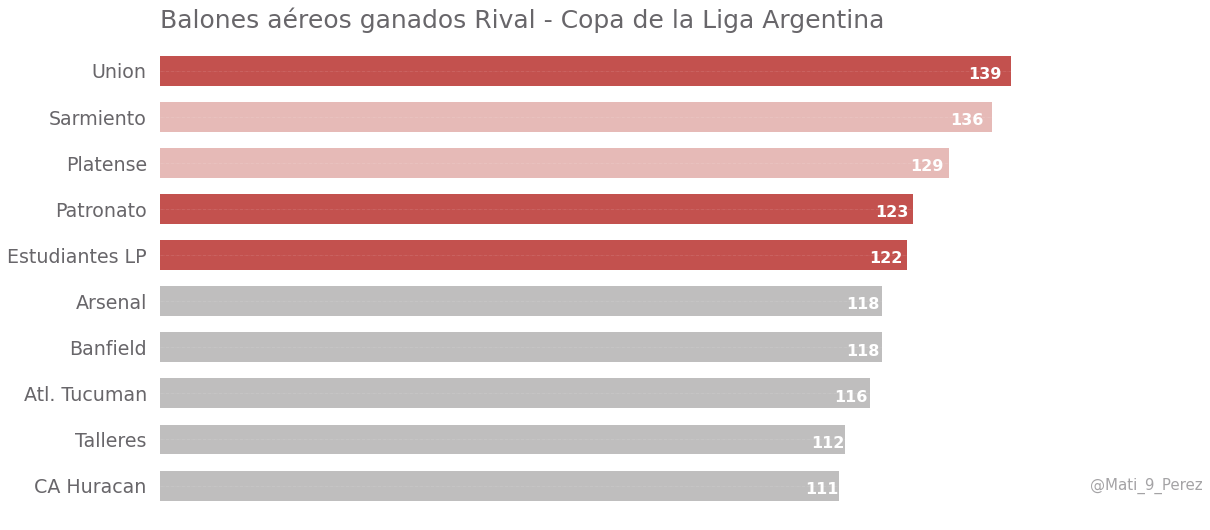

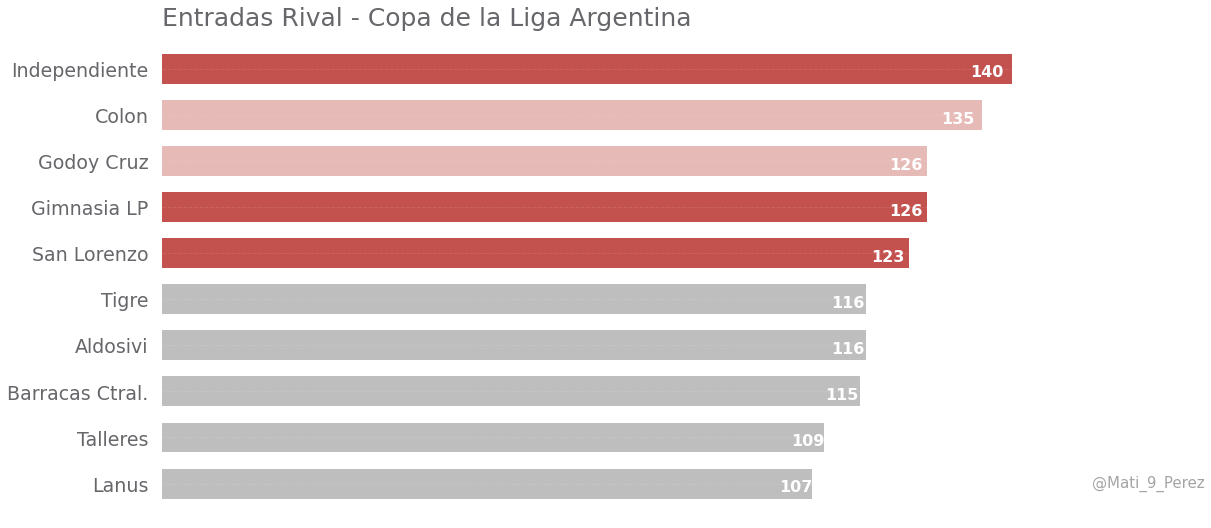

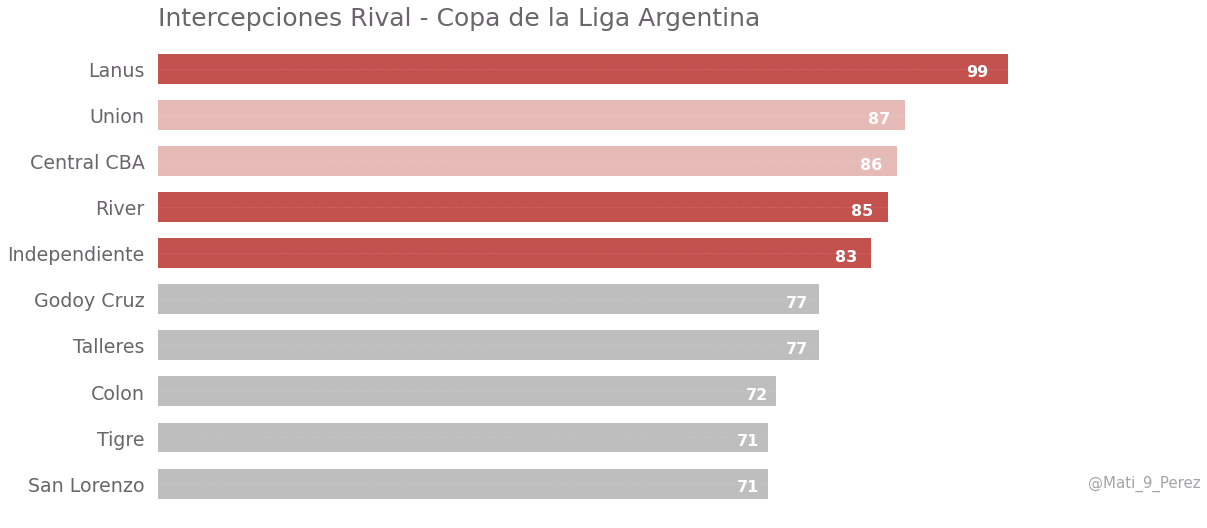

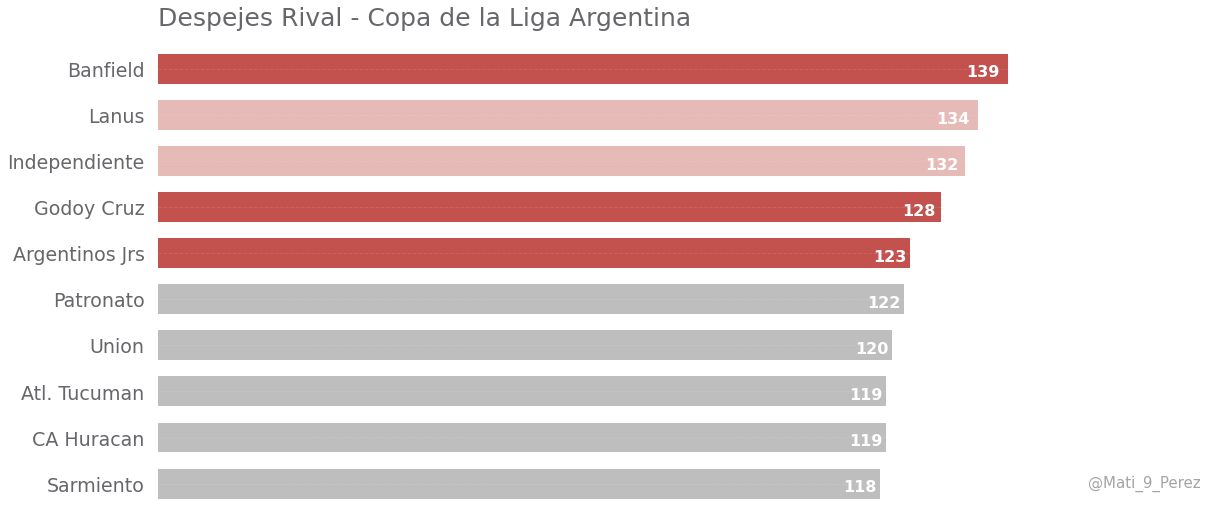

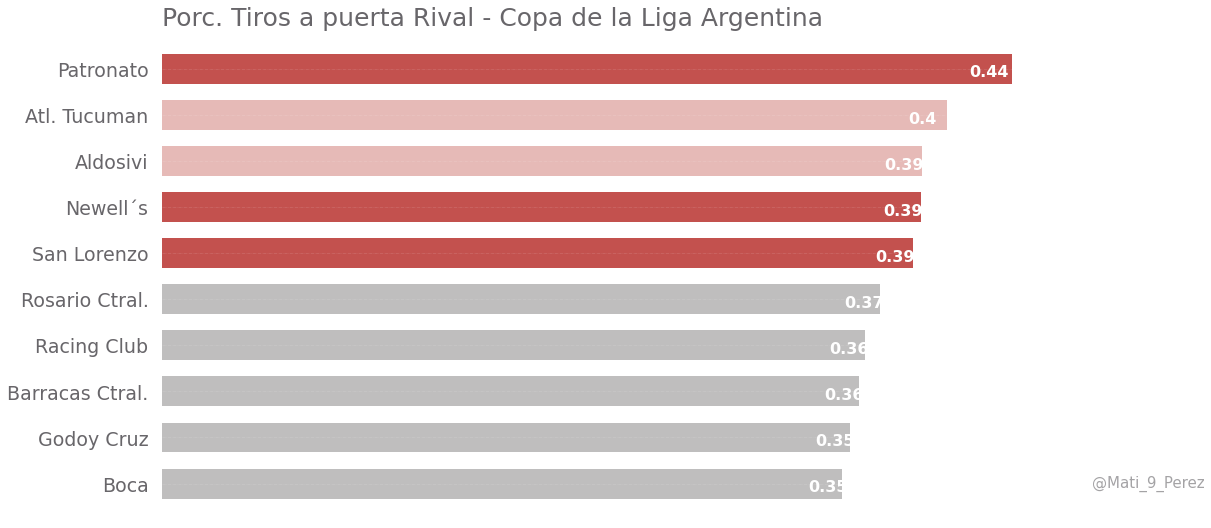

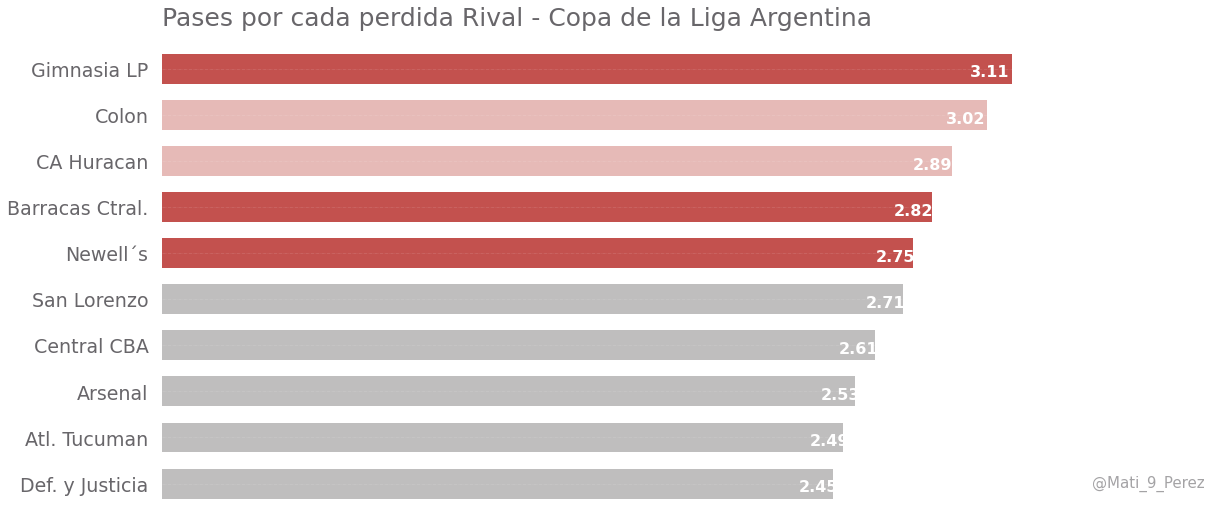

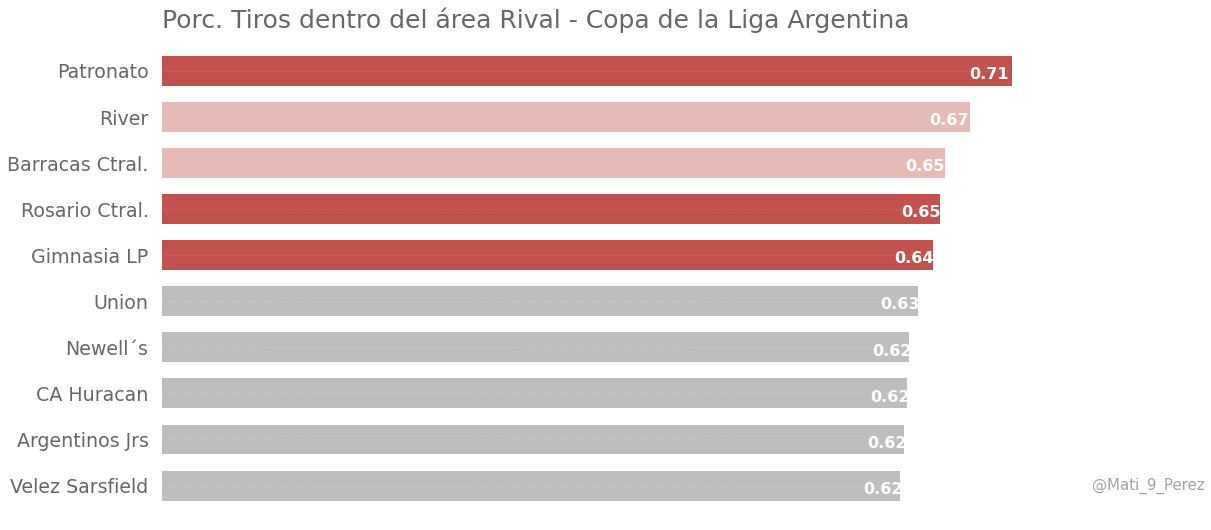

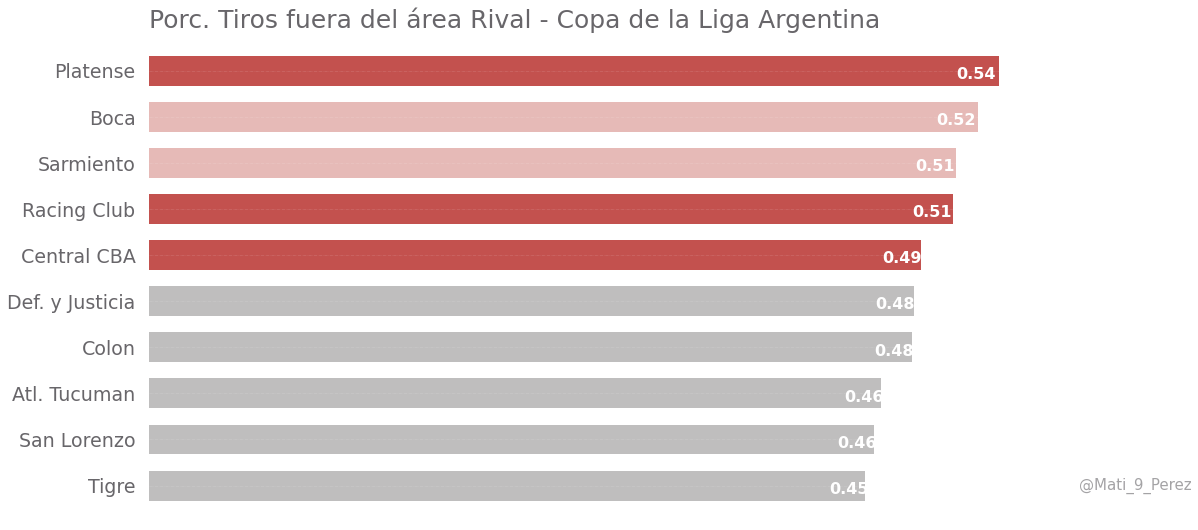

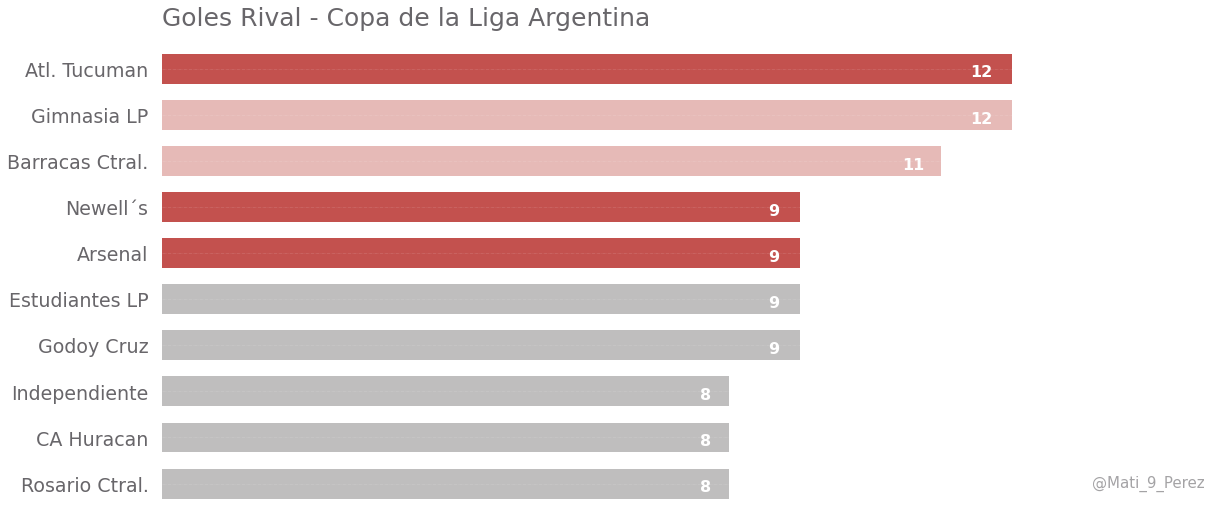

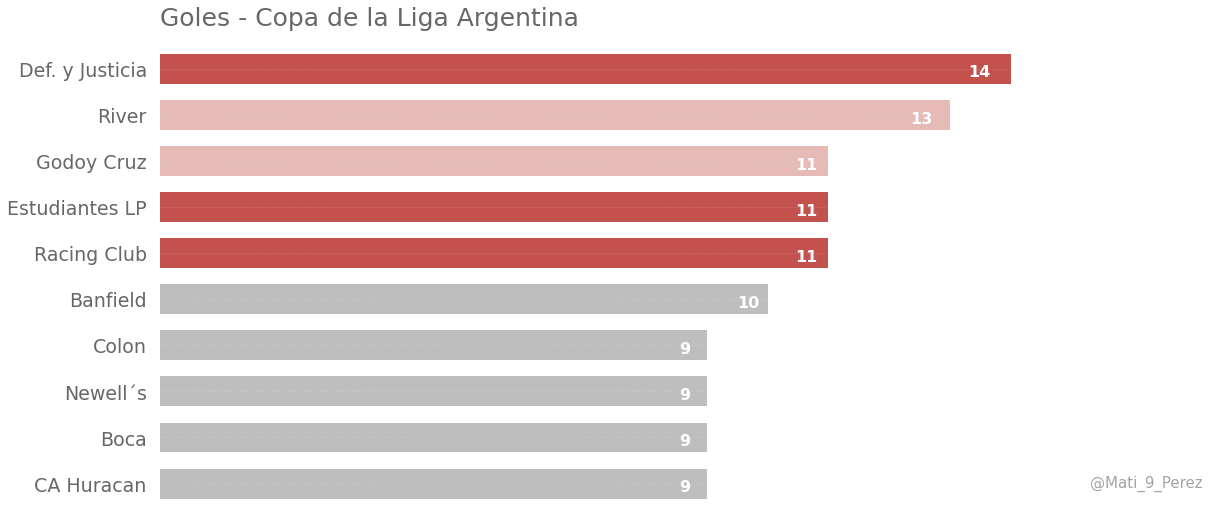

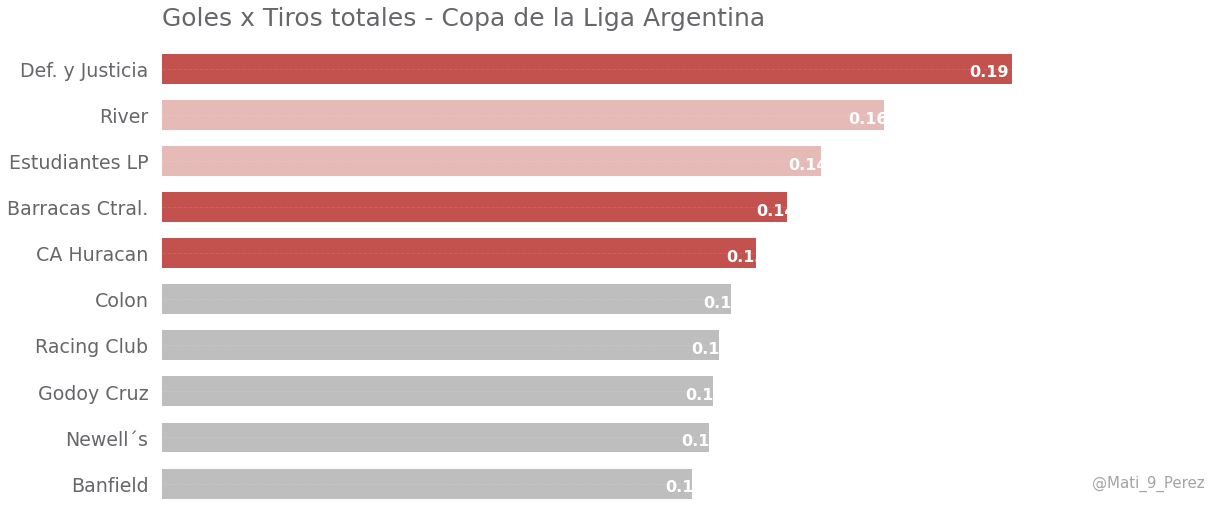

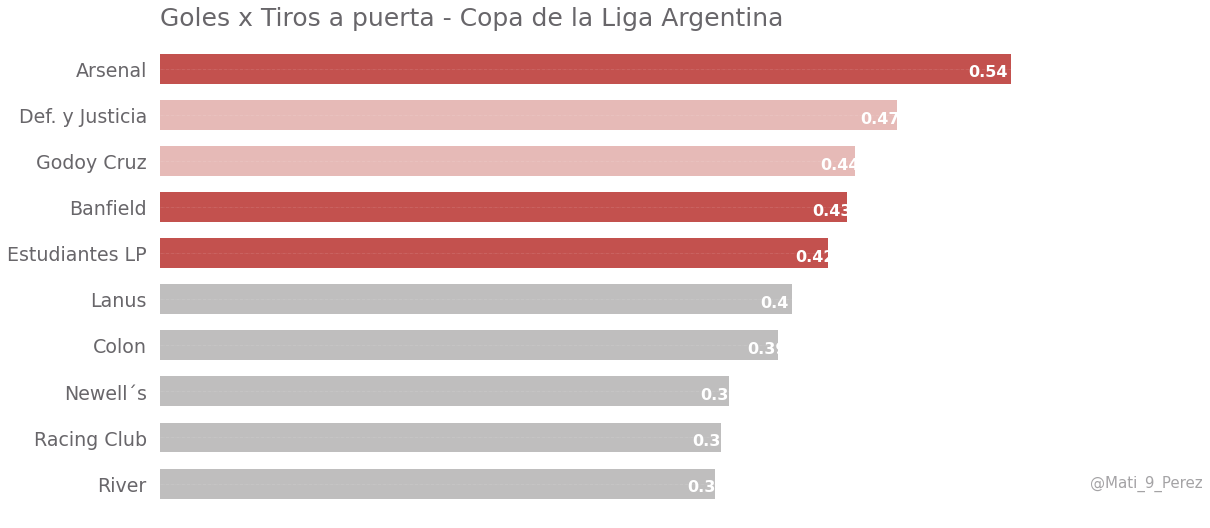

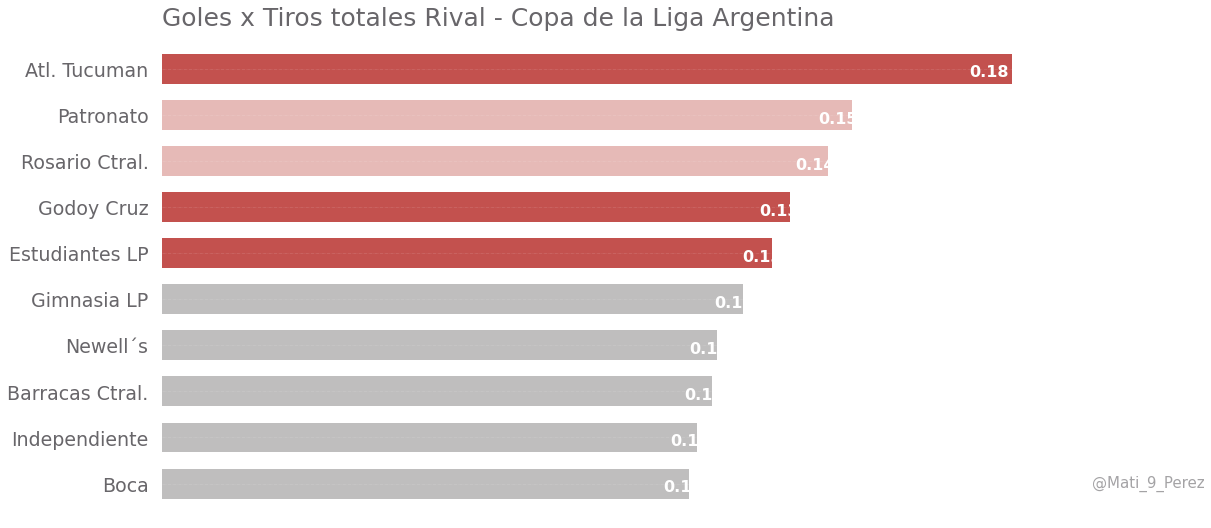

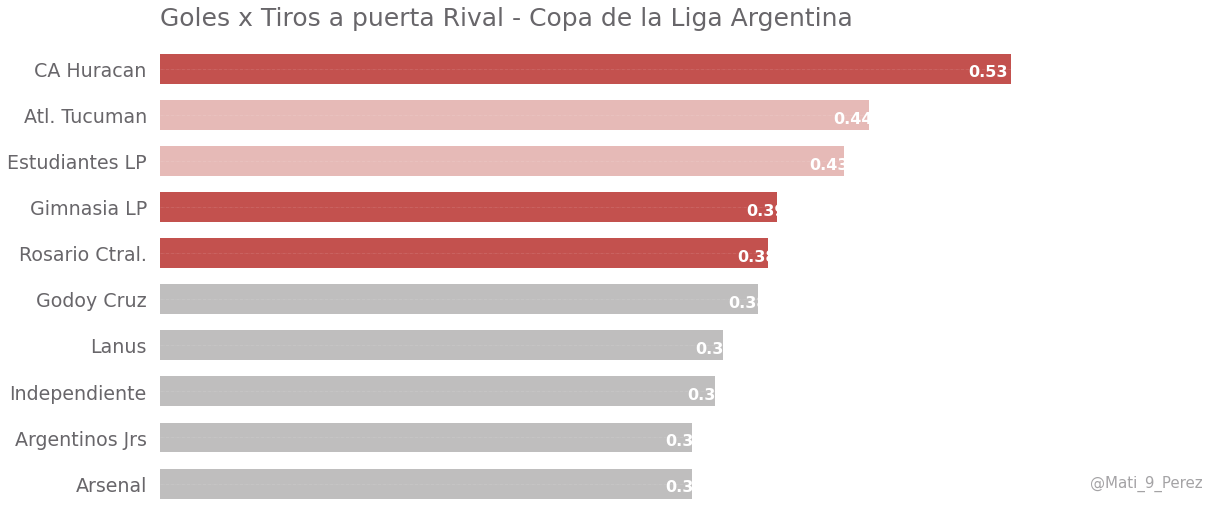

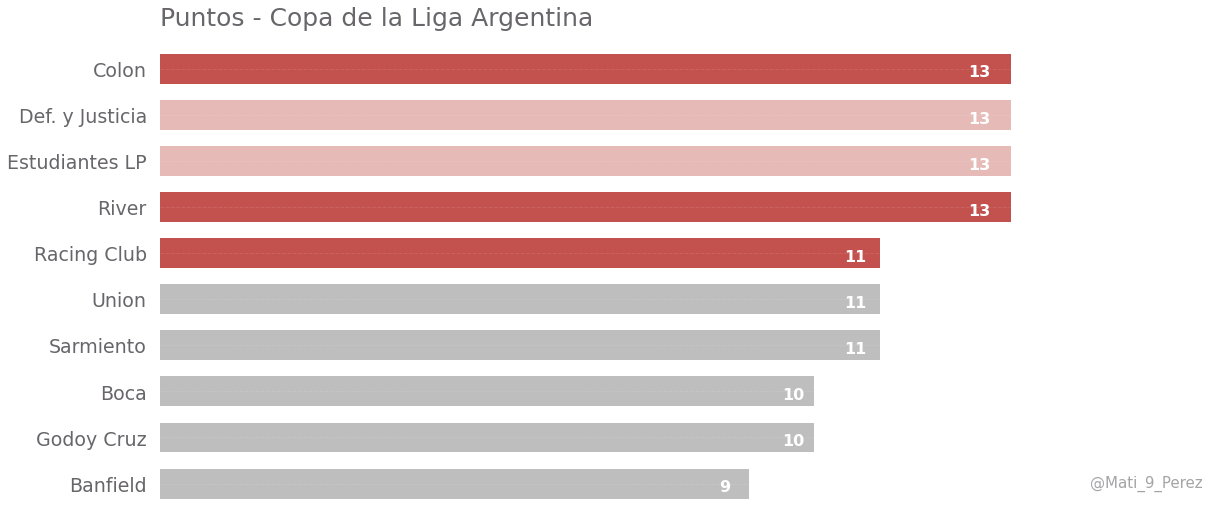

In [7]:
# 3° (Correr los primeros 2) Analisis de equipos TODAS LAS METRICAS
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.image as image
print(GLOBAL.columns)
listas=['Posesión perdida']
lista=['Posesión de balón', 'Tiros totales', 'Tiros a puerta', 'Tiros fuera',
       'Disparos bloqueados', 'Saques de esquina', 'Fueras de juego', 'Faltas',
       'Tarjetas amarillas', 'Tarjetas rojas', 'Ocasiones claras',
       'Ocasiones claras falladas', 'Disparos al Palo', 'Contraataques',
       'Tiros en contraataque', 'Goles en contraataque',
       'Tiros dentro del área', 'Tiros desde fuera del área', 'Paradas',
       'Pases', 'Pases totales', 'Porc. Pases efectivos',
       'Pases largos efectivos', 'Pases largos totales',
       'Porc. Pases largos efectivos', 'Centros completados',
       'Centros intentados', 'Porc. Centros completados',
       'Regates completados', 'Regates intentados', 'Porc. Regates efectivos',
       'Posesión perdida', 'Duelos ganados', 'Balones aéreos ganados',
       'Entradas', 'Intercepciones', 'Despejes']
for a in GLOBAL.columns:
        equipo=GLOBAL.sort_values(by=[a],ascending= False).head(10).index
        abscisa=equipo
        cantidad = GLOBAL.sort_values(by=[a],ascending= False)[a].head(10)

        def scale(im, nR, nC):
            """
            parameters
            im :image
            nR:row size
            nC:column size 
            Return: scaled image 
            """
            number_rows = len(im)     # source number of rows 
            number_columns = len(im[0])  # source number of columns 
            return [[ im[int(number_rows * r / nR)][int(number_columns * c / nC)]  
                         for c in range(nC)] for r in range(nR)]
        def watermark(ax,x0,y0):
            """
            adds image logo and positions it on the plot
            ax: figure object 
            x0: adds x 
            y0: adds y 
            """
            img = plt.imread('Copita.png')
            #scale Image
            img =scale(img, 800, 800)


            #print('transData(0,0) = {}'.format(ax.transData.transform((0,0))))
            ax.figure.figimage(img, x0,y0, alpha=.65, zorder=1,origin="upper")

        # Figure Size
        fig, ax = plt.subplots(figsize =(16, 9))
        watermark(ax,4150,200)
        ax.barh(abscisa, cantidad,height=0.65 ,color=['#c3514e', '#e6bab7', '#e6bab7', '#c3514e', '#c3514e','#bfbebe', '#bfbebe', '#bfbebe', '#bfbebe', '#bfbebe'])
        #c3514e rojo oscuro, #e6bab7 rosa,  #bfbebe gris, #8a796e gris oscuro letra - colores-
        
        ################fig.patch.set_facecolor('xkcd:dark') -Otro color de fondo-
        ################ax.set_facecolor('xkcd:dark')
        fig.patch.set_facecolor('w')
        ax.set_facecolor('w')
        
        # Remove axes splines
        for s in ['top', 'bottom', 'left', 'right']:
            ax.spines[s].set_visible(False)

        # Remove x, y Ticks
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')

        # Add padding between axes and labels
        
        #################ax.yaxis.set_tick_params(pad = 10,colors='linen',labelsize=16) -otro color-
        ax.yaxis.set_tick_params(pad = 10,colors='#68666a',labelsize=19)
        ax.axes.get_xaxis().set_visible(False)

        # Add x, y gridlines
        ax.grid(b = True, color ='w',
                linestyle ='-.', linewidth = 0.5,
                alpha = 0.2)

        # Show top values
        ax.invert_yaxis()

        # Add annotation to bars
        for i in ax.patches:
            plt.text(i.get_width()*0.95, i.get_y()+0.5,
                     str(round((i.get_width()), 2)),
                     fontsize = 16,fontweight ='bold',
                     color ='w')
        
        # Add Plot Title
        #############ax.set_title(parametro+' - Copa de la Liga Argentina',loc ='left', color='linen',fontsize = 25)
        ax.set_title(a+' - Copa de la Liga Argentina',
                     loc ='left', color='#68666a',fontsize = 25)

        # Add Text watermark
        fig.text(1.03, 0.17, '@Mati_9_Perez', fontsize = 15,
                 color ='#68666a', ha ='right', va ='bottom',
                 alpha = 0.6)

        # Show Plot
plt.show()
        #fig.savefig('myimage.svg', format='svg', dpi=1200)
        #plt.savefig('destination_path.eps', format='eps')
        #fig.savefig(a+' Equipos'+' F6.png', dpi = 300,bbox_inches="tight")
        #fig.savefig('plot_name1200.png', dpi = 1200)